# **Analysis codes for "Mortality Associated with Accessibility to Coronary Angiography and Percutaneous Coronary Intervention in Patients with Acute Coronary Syndrome: A Propensity-Matched Cohort Study Using the Thai National Claims Database"**

## **Install packages**

In [2]:
install.packages("tableone"); install.packages("broom"); install.packages("survival")
install.packages("MatchIt"); install.packages("cobalt"); install.packages("rgenoud")
install.packages("rbounds"); install.packages("conflicted")
install.packages("survey"); install.packages("finalfit"); install.packages("optmatch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gtools’, ‘minqa’, ‘numDeriv’, ‘mitools’, ‘proxy’, ‘gdata’, ‘survey’, ‘e1071’, ‘zoo’, ‘gmodels’, ‘labelled’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘chk’, ‘RcppProgress’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tableone); library(broom); library(survival)
library(MatchIt); library(cobalt); library(rgenoud)
library(lme4); library(rbounds); library(conflicted)
library(survey); library(optmatch)
library(tidyverse); library(finalfit)

conflict_prefer("select", "dplyr")
conflict_prefer("filter", "dplyr")

 cobalt (Version 4.5.2, Build Date: 2023-11-20)


Attaching package: ‘cobalt’


The following object is masked from ‘package:MatchIt’:

    lalonde


##  rgenoud (Version 5.9-0.3, Build Date: 2022-04-19)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##


Loading required package: Matrix

Loading required package: grid

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
[conflicted] Will prefer dplyr::select over any other package.
[conflicted] Will prefer dplyr::filter over any other package.


In [4]:
library(data.table)

In [66]:
install.packages("epiDisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
library(epiDisplay)

Loading required package: foreign

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet



In [78]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [79]:
library(survminer)

Loading required package: ggpubr



In [117]:
install.packages("EValue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mathjaxr’, ‘pbapply’, ‘metafor’, ‘metadat’, ‘MetaUtility’




In [118]:
library(EValue)

## **Import dataset**

Note that only users with permission from the NHSO, Thailand can access this dataset. If you need to access it, please contact NHSO, Thailand to request the permission.

In [18]:
download.file("https://drive.usercontent.google.com/uc?id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
              tf <- tempfile())
acm<-readRDS(tf)

# **PSM for STEMI**

In [19]:
stemi<-acm[type=="STEMI",c("pid","pci","sex","age","ht","dlp","dm","hyper","hypo",
                           "ckd","obses","vhd",
                           "stroke","af","chf",
                           "rgn2","ref")]

In [27]:
stemi_f <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                                   "ckd","esrd","obses","vhd",
                                   "stroke","af","chf",
                                   "ref","rgn2"), strata = "pci",
                          data = stemi, test = FALSE)
print(stemi_f, smd = TRUE)

Warning message in ModuleReturnVarsExist(vars, data):
“The data frame does not have: esrd  Dropped”


                   Stratified by pci
                    FALSE         TRUE          SMD   
  n                  2702          7293               
  sex = Male (%)     1756 (65.0)   5209 (71.4)   0.139
  age (mean (SD))   66.48 (12.88) 63.60 (11.42)  0.236
  ht = TRUE (%)      1152 (42.6)   3501 (48.0)   0.108
  dlp = TRUE (%)      927 (34.3)   3342 (45.8)   0.237
  dm = TRUE (%)       662 (24.5)   2064 (28.3)   0.086
  hyper = TRUE (%)     25 ( 0.9)     38 ( 0.5)   0.048
  hypo = TRUE (%)      38 ( 1.4)     81 ( 1.1)   0.027
  ckd = TRUE (%)      365 (13.5)    626 ( 8.6)   0.158
  obses = TRUE (%)      6 ( 0.2)     28 ( 0.4)   0.029
  vhd = TRUE (%)       84 ( 3.1)    228 ( 3.1)   0.001
  stroke = TRUE (%)   160 ( 5.9)    221 ( 3.0)   0.140
  af = TRUE (%)       165 ( 6.1)    491 ( 6.7)   0.026
  chf = TRUE (%)      620 (22.9)   1305 (17.9)   0.126
  ref = TRUE (%)      142 ( 5.3)   1151 (15.8)   0.348
  rgn2 (%)                                       0.632
     1                286 (1

For reproducibility, we set seed at 123.

In [22]:
set.seed(123)

In [23]:
stemi_m <- matchit(pci ~ sex + age + ht + dlp + dm + hyper + hypo + ckd + obses + vhd + stroke + af + chf + rgn2 + ref,
                   method = "optimal", data = stemi)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”


Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


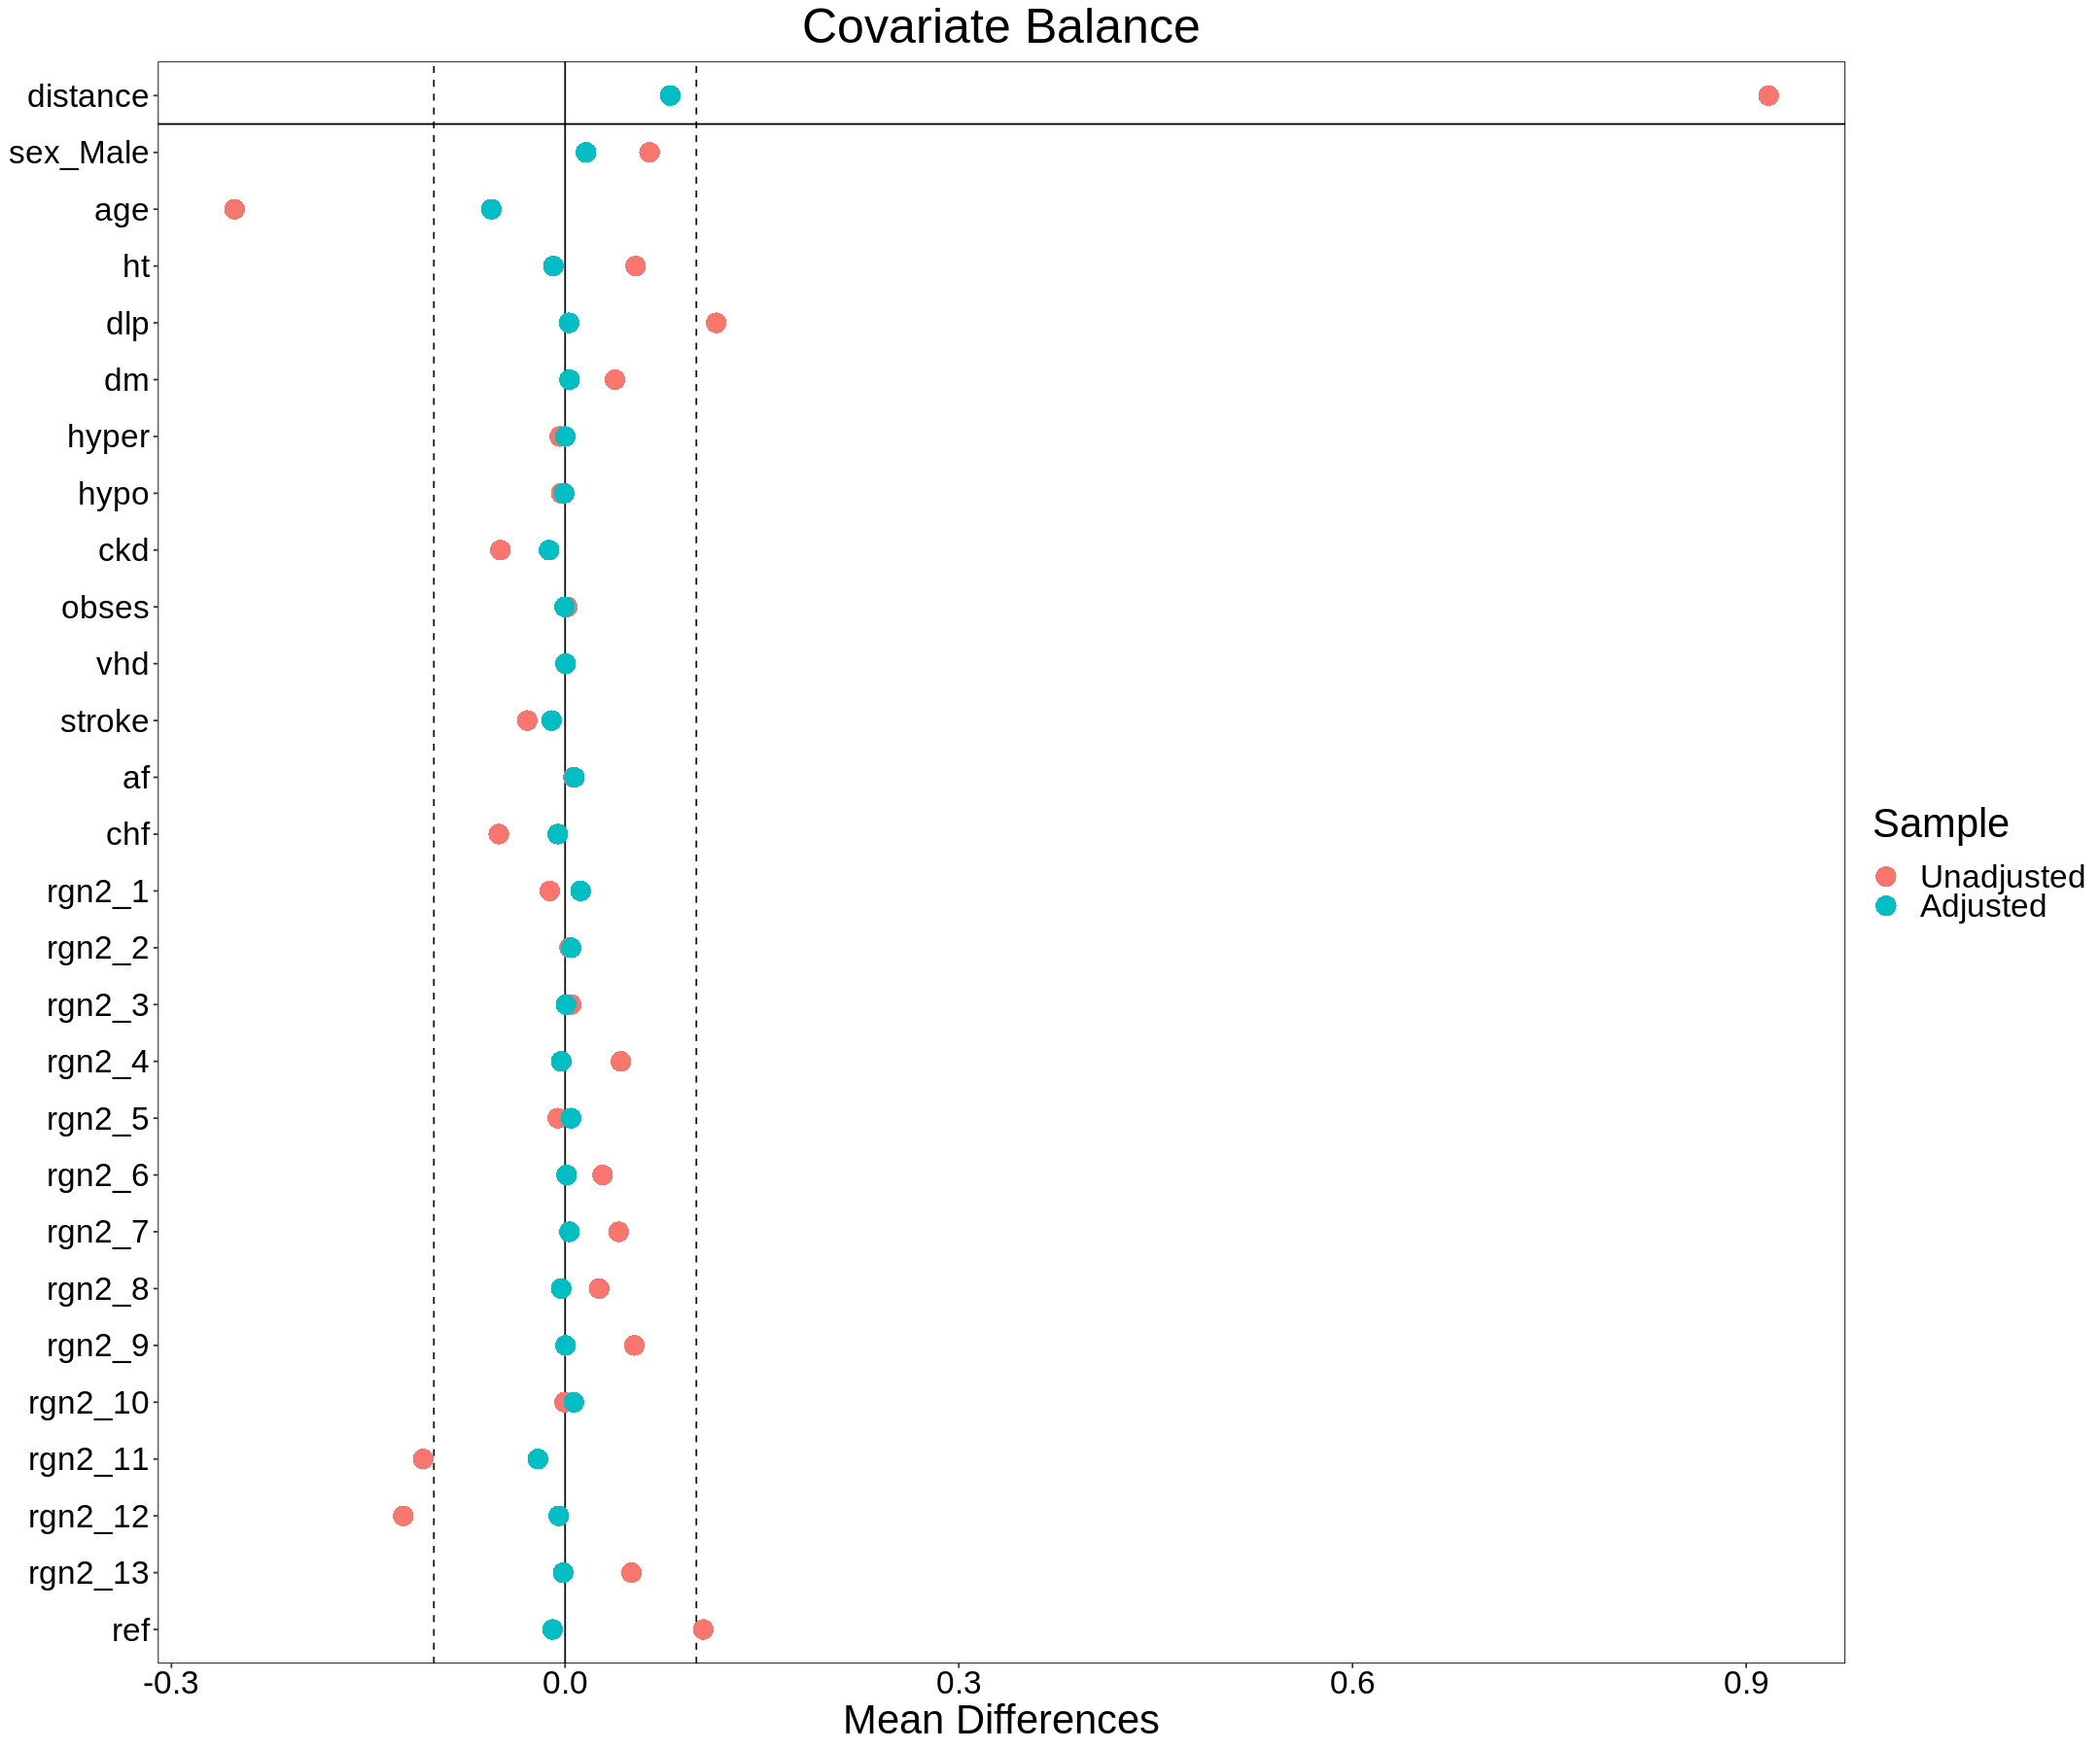

In [24]:
options(repr.plot.width=18, repr.plot.height=15)
love.plot(stemi_m,
          thresholds = c(m = .1, v = .05),
          s.dots = TRUE,size = 6)+
  theme(text = element_text(size = 25))

The balance is better.

In [26]:
stemi_match_data <- match.data(stemi_m)
stemi_table <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                           "ckd","esrd","obses","vhd",
                           "stroke","af","chf","ref",
                           "rgn2"), data = stemi_match_data, strata = "pci")
print(stemi_table, smd = TRUE)

Warning message in ModuleReturnVarsExist(vars, data):
“The data frame does not have: esrd  Dropped”


                   Stratified by pci
                    FALSE         TRUE          p      test SMD   
  n                  2702          2702                           
  sex = Male (%)     1756 (65.0)   1799 (66.6)   0.228       0.034
  age (mean (SD))   66.48 (12.88) 65.84 (11.95)  0.058       0.052
  ht = TRUE (%)      1152 (42.6)   1128 (41.7)   0.526       0.018
  dlp = TRUE (%)      927 (34.3)    935 (34.6)   0.841       0.006
  dm = TRUE (%)       662 (24.5)    671 (24.8)   0.801       0.008
  hyper = TRUE (%)     25 ( 0.9)     25 ( 0.9)   1.000      <0.001
  hypo = TRUE (%)      38 ( 1.4)     36 ( 1.3)   0.907       0.006
  ckd = TRUE (%)      365 (13.5)    332 (12.3)   0.194       0.036
  obses = TRUE (%)      6 ( 0.2)      5 ( 0.2)   1.000       0.008
  vhd = TRUE (%)       84 ( 3.1)     85 ( 3.1)   1.000       0.002
  stroke = TRUE (%)   160 ( 5.9)    132 ( 4.9)   0.104       0.046
  af = TRUE (%)       165 ( 6.1)    184 ( 6.8)   0.319       0.029
  chf = TRUE (%)      620

# **PSM for NST-ACS**

In [28]:
nstacs<-acm[type=="NSTACS",c("pid","pci","sex","age","ht","dlp","dm","hyper","hypo",
                             "ckd","obses","vhd",
                             "stroke","af","chf",
                             "rgn2","ref")]

In [29]:
nstacs_f <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                                    "ckd","obses","vhd",
                                    "stroke","af","chf",
                                    "ref","rgn2"), strata = "pci",
                           data = nstacs, test = FALSE)
print(nstacs_f, smd = TRUE)

                   Stratified by pci
                    FALSE         TRUE          SMD   
  n                 15741          5072               
  sex = Male (%)     8057 (51.2)   3061 (60.4)   0.185
  age (mean (SD))   68.99 (12.19) 64.95 (10.83)  0.350
  ht = TRUE (%)      9016 (57.3)   3639 (71.7)   0.306
  dlp = TRUE (%)     6018 (38.2)   3300 (65.1)   0.557
  dm = TRUE (%)      5599 (35.6)   2131 (42.0)   0.133
  hyper = TRUE (%)    205 ( 1.3)     54 ( 1.1)   0.022
  hypo = TRUE (%)     388 ( 2.5)    109 ( 2.1)   0.021
  ckd = TRUE (%)     4213 (26.8)    951 (18.8)   0.192
  obses = TRUE (%)     51 ( 0.3)     35 ( 0.7)   0.052
  vhd = TRUE (%)      967 ( 6.1)    285 ( 5.6)   0.022
  stroke = TRUE (%)   605 ( 3.8)    179 ( 3.5)   0.017
  af = TRUE (%)      1730 (11.0)    403 ( 7.9)   0.104
  chf = TRUE (%)     6064 (38.5)   1473 (29.0)   0.201
  ref = TRUE (%)      565 ( 3.6)    474 ( 9.3)   0.236
  rgn2 (%)                                       0.437
     1               1302 ( 

In [30]:
set.seed(123)

In [31]:
nstacs_p<-nstacs[pci==TRUE]

In [32]:
nstacs_c<-nstacs[pci==FALSE]

In [33]:
nstacs1<-rbind(nstacs_p[1:2600],nstacs_c[1:8000])

In [34]:
nstacs_m1 <- matchit(pci ~ sex + age + ht + dlp + dm + hyper + hypo + ckd + obses + vhd + stroke + af + chf + rgn2 + ref,
                    method = "optimal", data = nstacs1)

Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


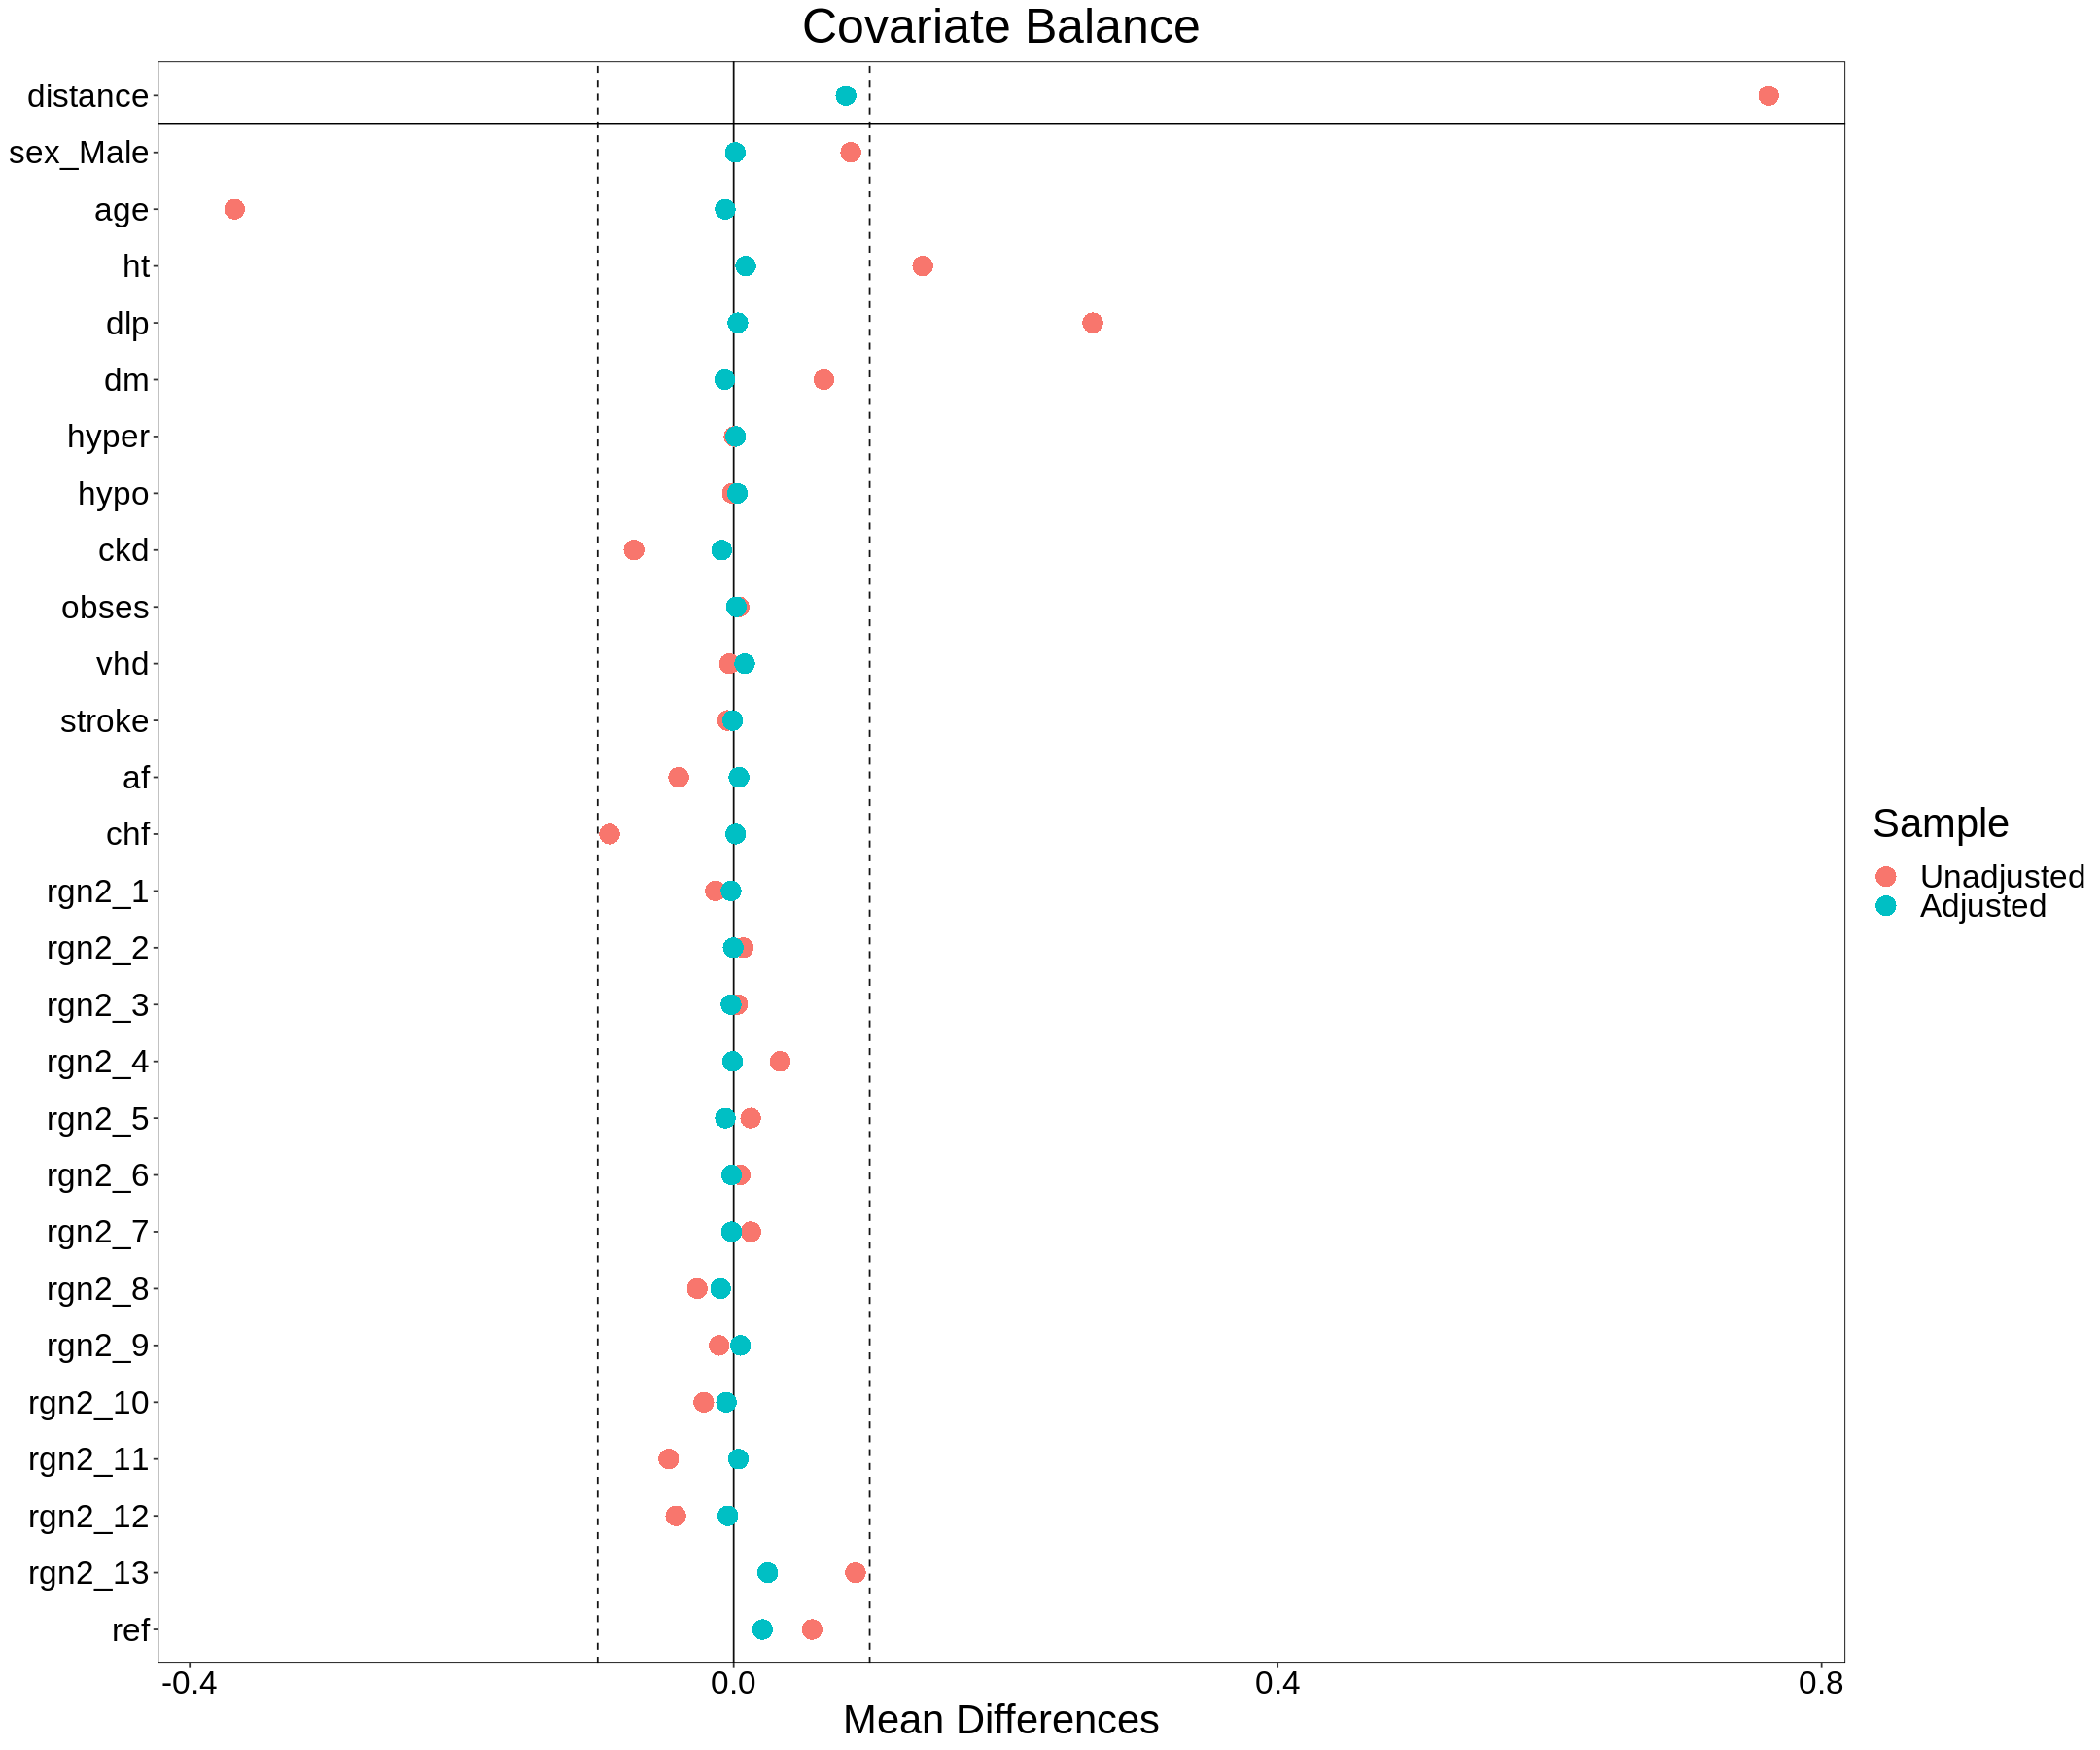

In [35]:
love.plot(nstacs_m1,
          thresholds = c(m = .1, v = .05),
          s.dots = TRUE,size = 6)+
  theme(text = element_text(size = 25))

In [36]:
nstacs1_match_data <- match.data(nstacs_m1)

In [38]:
nstacs2<-rbind(nstacs_p[2601:5072],nstacs_c[8001:15741])

In [39]:
nstacs_m2 <- matchit(pci ~ sex + age + ht + dlp + dm + hyper + hypo + ckd + obses + vhd + stroke + af + chf + rgn2 + ref,
                    method = "optimal", data = nstacs2)

Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


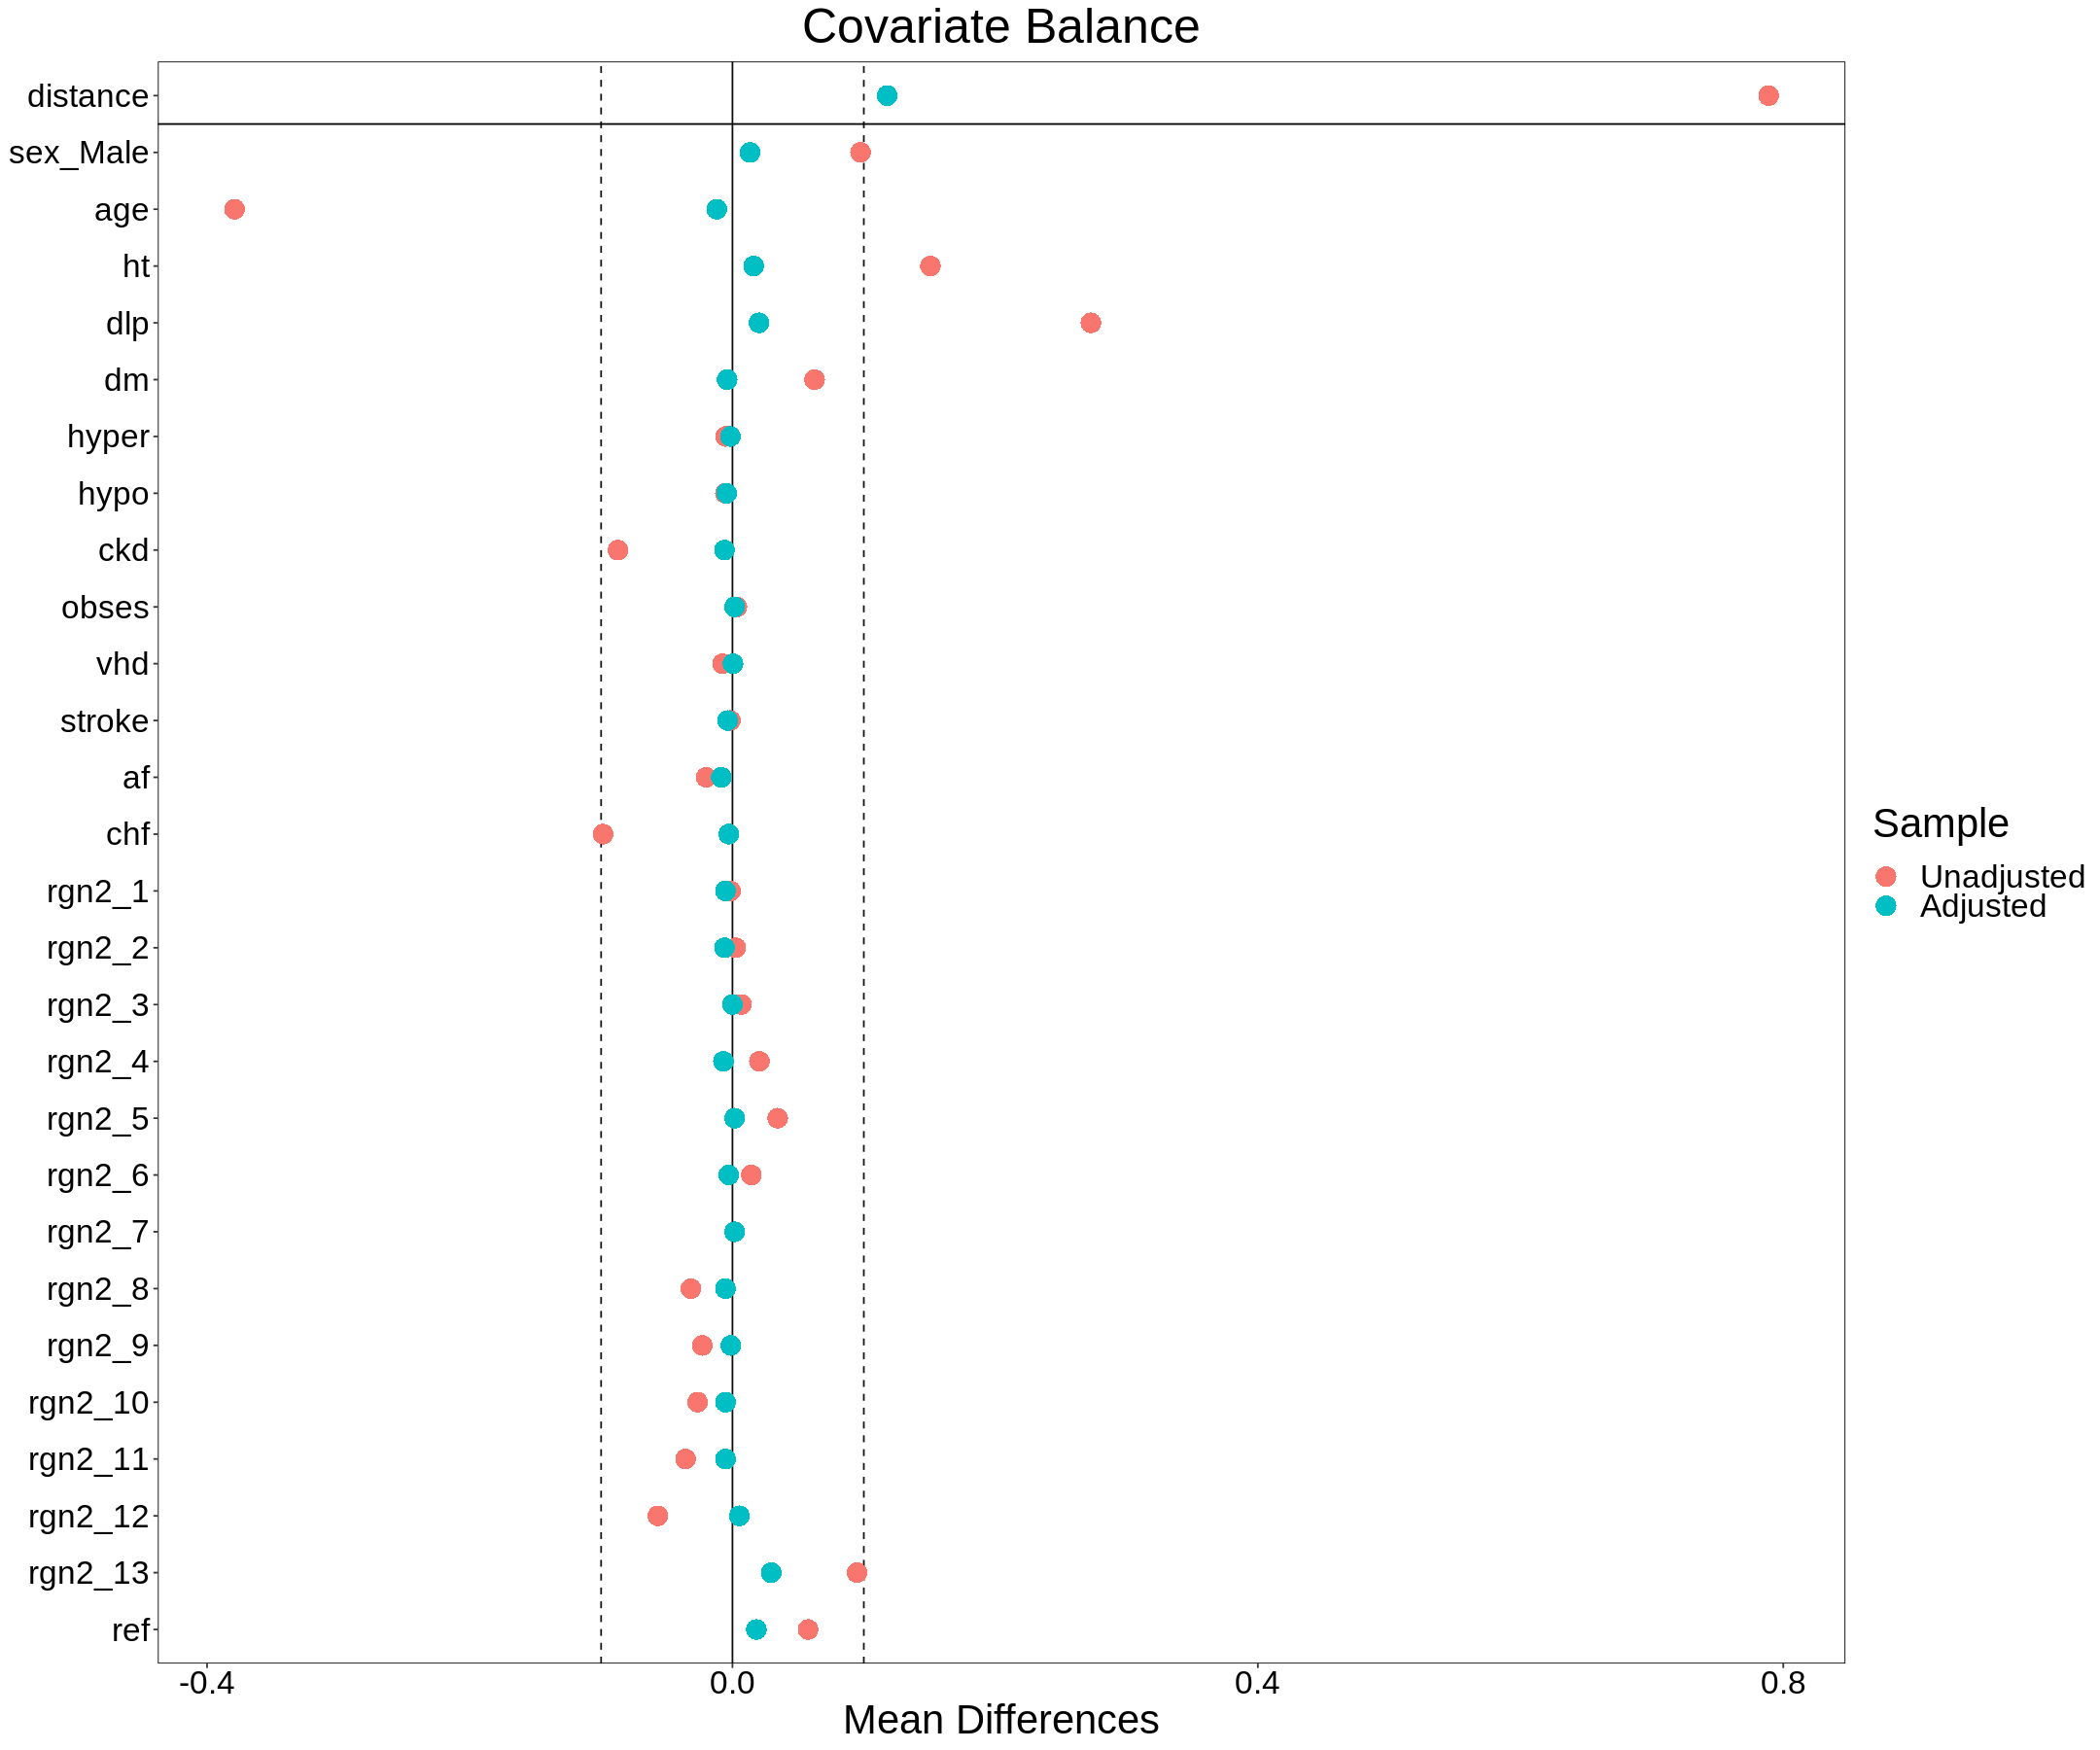

In [40]:
love.plot(nstacs_m2,
          thresholds = c(m = .1, v = .05),
          s.dots = TRUE,size = 6)+
  theme(text = element_text(size = 25))

In [41]:
nstacs2_match_data <- match.data(nstacs_m2)

In [42]:
nstacs_match_data<-rbind(nstacs1_match_data,nstacs2_match_data)

In [45]:
nstacs_table <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                                      "ckd","esrd","obses","vhd",
                                      "stroke","af","chf","ref",
                                      "rgn2"), data = nstacs_match_data, strata = "pci")

Warning message in ModuleReturnVarsExist(vars, data):
“The data frame does not have: esrd  Dropped”


In [46]:
print(nstacs_table, smd = TRUE)

                   Stratified by pci
                    FALSE         TRUE          p      test SMD   
  n                  5072          5072                           
  sex = Male (%)     3025 (59.6)   3061 (60.4)   0.478       0.014
  age (mean (SD))   65.05 (12.05) 64.95 (10.83)  0.667       0.009
  ht = TRUE (%)      3576 (70.5)   3639 (71.7)   0.174       0.027
  dlp = TRUE (%)     3242 (63.9)   3300 (65.1)   0.237       0.024
  dm = TRUE (%)      2158 (42.5)   2131 (42.0)   0.601       0.011
  hyper = TRUE (%)     54 ( 1.1)     54 ( 1.1)   1.000      <0.001
  hypo = TRUE (%)     113 ( 2.2)    109 ( 2.1)   0.839       0.005
  ckd = TRUE (%)      989 (19.5)    951 (18.8)   0.350       0.019
  obses = TRUE (%)     26 ( 0.5)     35 ( 0.7)   0.304       0.023
  vhd = TRUE (%)      263 ( 5.2)    285 ( 5.6)   0.356       0.019
  stroke = TRUE (%)   190 ( 3.7)    179 ( 3.5)   0.596       0.012
  af = TRUE (%)       414 ( 8.2)    403 ( 7.9)   0.715       0.008
  chf = TRUE (%)     1476

In [47]:
mid<-rbind(stemi_match_data,nstacs_match_data)

In [50]:
mid<-mid[,-c("distance","weights","subclass")]

Add follow up data

In [53]:
axc<-acm[,c("pid","type","pci","dateadm","datedsc","death_date","dcause_oth")]
axc$indeath<- axc$death_date <= axc$datedsc
axc$indeath<-replace_na(axc$indeath,FALSE)

In [54]:
md<-merge(mid[,c("pid")],axc,by="pid",all.x=TRUE)

# **In-hospital mortality ratio**

In [58]:
df<-md[,c("pid","type","pci","indeath")]

In [59]:
results <- df %>%
  group_by(type,pci) %>%
  summarize(death_count = sum(indeath),
            total_count = n(), .groups = 'drop') %>%
  mutate(death_prob = death_count / total_count,
         incidence_per_1000 = (death_prob * 1000)) %>%
  pivot_wider(names_from = pci, values_from = c(death_count, total_count, death_prob, incidence_per_1000),
              names_glue = "{pci}_{.value}") %>%
  mutate(
    RR = ifelse(FALSE_death_count == 0 | TRUE_death_count == 0, NA, TRUE_death_prob / FALSE_death_prob),
    SE_log_RR = sqrt((1 / (TRUE_death_count + 0.5)) / (TRUE_total_count + 1) +
                       (1 / (FALSE_death_count + 0.5)) / (FALSE_total_count + 1)),
    lower_ci = exp(log(RR) - 1.96 * SE_log_RR),
    upper_ci = exp(log(RR) + 1.96 * SE_log_RR)) %>%
  select(type, TRUE_death_count, FALSE_death_count, TRUE_incidence_per_1000, FALSE_incidence_per_1000, RR, lower_ci, upper_ci)

In [65]:
as.data.frame(results) %>% arrange(desc(type))

type,TRUE_death_count,FALSE_death_count,TRUE_incidence_per_1000,FALSE_incidence_per_1000,RR,lower_ci,upper_ci
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STEMI,276,917,102.14656,339.37824,0.3009815,0.3002040,0.3017609
NSTACS,167,481,32.92587,94.83438,0.3471933,0.3463373,0.3480515


# **Exclude in-hospital death**

In [68]:
md<-md[indeath==FALSE]

**Check for balance again**

In [69]:
md2<-merge(md,acm[,c("pid","sex","age","ht","dlp","dm","hyper","hypo",
         "ckd","obses","vhd",
         "stroke","af","chf",
         "ref","rgn2")],by="pid",all.x = TRUE)

Balance among patients with STEMI

In [70]:
stemi_s<-md2[type=="STEMI"]

stemi_sf <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                                   "ckd","obses","vhd",
                                   "stroke","af","chf",
                                   "ref","rgn2"), strata = "pci",
                          data = stemi_s, test = TRUE)
print(stemi_sf, smd = TRUE)

                   Stratified by pci
                    FALSE         TRUE          p      test SMD   
  n                  1785          2426                           
  sex = Male (%)     1245 (69.7)   1660 (68.4)   0.377       0.029
  age (mean (SD))   64.81 (12.86) 65.07 (11.75)  0.500       0.021
  ht = TRUE (%)       846 (47.4)   1058 (43.6)   0.016       0.076
  dlp = TRUE (%)      779 (43.6)    901 (37.1)  <0.001       0.133
  dm = TRUE (%)       430 (24.1)    604 (24.9)   0.572       0.019
  hyper = TRUE (%)     20 ( 1.1)     22 ( 0.9)   0.594       0.021
  hypo = TRUE (%)      30 ( 1.7)     32 ( 1.3)   0.405       0.030
  ckd = TRUE (%)      271 (15.2)    307 (12.7)   0.021       0.073
  obses = TRUE (%)      5 ( 0.3)      5 ( 0.2)   0.867       0.015
  vhd = TRUE (%)       52 ( 2.9)     79 ( 3.3)   0.586       0.020
  stroke = TRUE (%)    79 ( 4.4)    110 ( 4.5)   0.926       0.005
  af = TRUE (%)       103 ( 5.8)    159 ( 6.6)   0.329       0.033
  chf = TRUE (%)      382

Balance among patients with NST-ACS

In [71]:
nstacs_s<-md2[type=="NSTACS"]
nstacs_sf <- CreateTableOne(vars = c("sex","age","ht","dlp","dm","hyper","hypo",
                                    "ckd","obses","vhd",
                                    "stroke","af","chf",
                                    "ref","rgn2"), strata = "pci",
                           data = nstacs_s, test = TRUE)
print(nstacs_sf, smd = TRUE)

                   Stratified by pci
                    FALSE         TRUE          p      test SMD   
  n                  4591          4905                           
  sex = Male (%)     2746 (59.8)   2978 (60.7)   0.381       0.018
  age (mean (SD))   64.70 (11.98) 64.76 (10.77)  0.799       0.005
  ht = TRUE (%)      3315 (72.2)   3541 (72.2)   1.000      <0.001
  dlp = TRUE (%)     3036 (66.1)   3233 (65.9)   0.840       0.005
  dm = TRUE (%)      1963 (42.8)   2058 (42.0)   0.442       0.016
  hyper = TRUE (%)     50 ( 1.1)     53 ( 1.1)   1.000       0.001
  hypo = TRUE (%)     105 ( 2.3)    106 ( 2.2)   0.729       0.009
  ckd = TRUE (%)      899 (19.6)    908 (18.5)   0.193       0.027
  obses = TRUE (%)     23 ( 0.5)     35 ( 0.7)   0.231       0.027
  vhd = TRUE (%)      242 ( 5.3)    273 ( 5.6)   0.557       0.013
  stroke = TRUE (%)   145 ( 3.2)    166 ( 3.4)   0.575       0.013
  af = TRUE (%)       360 ( 7.8)    364 ( 7.4)   0.464       0.016
  chf = TRUE (%)     1297

# **Cox regression for death from any cause**

Function for kaplan plotting

In [76]:
customize_labels <- function (p, font.title = NULL,
                              font.subtitle = NULL, font.caption = NULL,
                              font.x = NULL, font.y = NULL, font.xtickslab = NULL, font.ytickslab = NULL)
{
  original.p <- p
  if(is.ggplot(original.p)) list.plots <- list(original.p)
  else if(is.list(original.p)) list.plots <- original.p
  else stop("Can't handle an object of class ", class (original.p))
  .set_font <- function(font){
    font <- ggpubr:::.parse_font(font)
    ggtext::element_markdown (size = font$size, face = font$face, colour = font$color)
  }
  for(i in 1:length(list.plots)){
    p <- list.plots[[i]]
    if(is.ggplot(p)){
      if (!is.null(font.title)) p <- p + theme(plot.title = .set_font(font.title))
      if (!is.null(font.subtitle)) p <- p + theme(plot.subtitle = .set_font(font.subtitle))
      if (!is.null(font.caption)) p <- p + theme(plot.caption = .set_font(font.caption))
      if (!is.null(font.x)) p <- p + theme(axis.title.x = .set_font(font.x))
      if (!is.null(font.y)) p <- p + theme(axis.title.y = .set_font(font.y))
      if (!is.null(font.xtickslab)) p <- p + theme(axis.text.x = .set_font(font.xtickslab))
      if (!is.null(font.ytickslab)) p <- p + theme(axis.text.y = .set_font(font.ytickslab))
      list.plots[[i]] <- p
    }
  }
  if(is.ggplot(original.p)) list.plots[[1]]
  else list.plots
}

In [73]:
md$death<-!is.na(md$death_date)
md$fday<-interval(md$datedsc,md$death_date)/duration(1,"days")
md$fday<-replace_na(md$fday,1825)
md$death[md$fday>1825 & md$death == TRUE]<-FALSE
md$fday[md$fday>1825]<-1825

In [83]:
options(repr.plot.width=18, repr.plot.height=8)

### **HR of STEMI**

In [109]:
stemi<-md[type=="STEMI"]
fit_cad_stemi <- survfit(Surv(fday, death) ~ pci, data = stemi)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


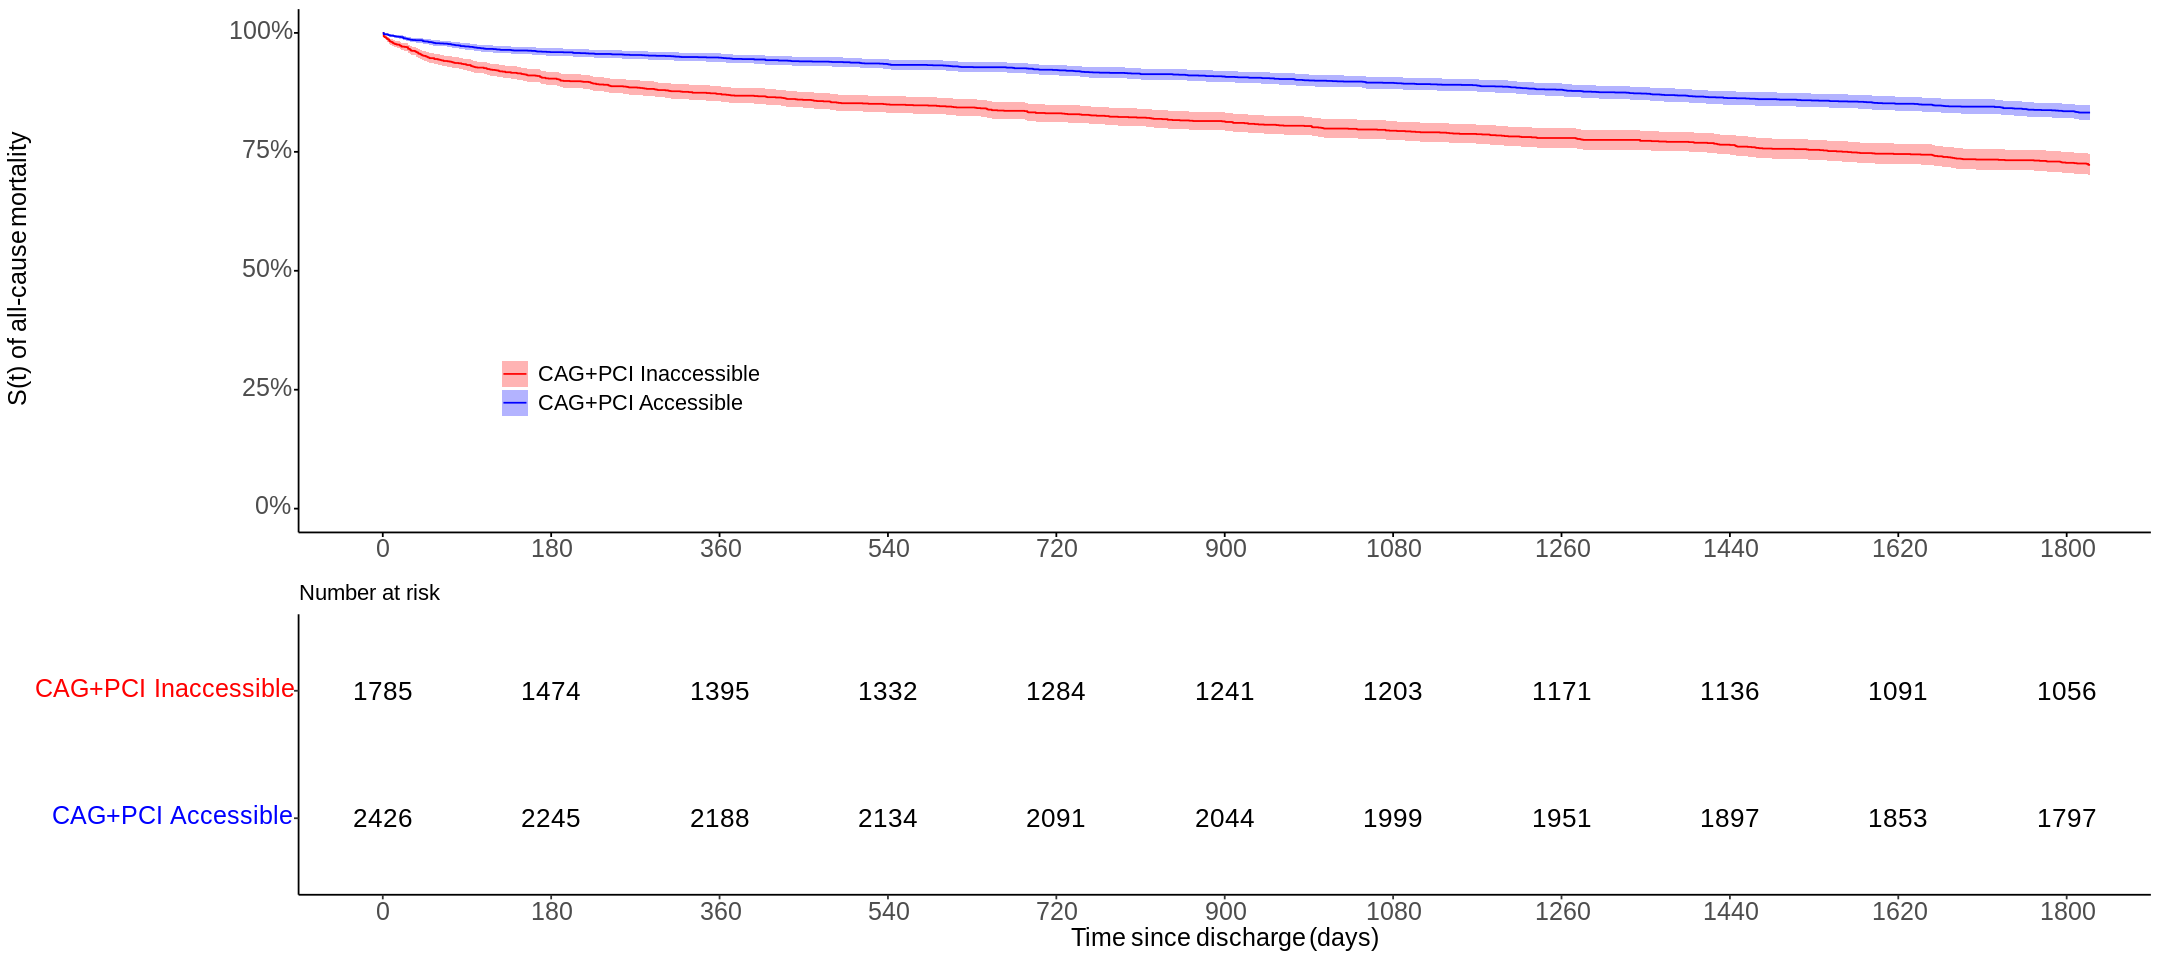

In [110]:
ggsurv_cad_stemi <-ggsurvplot(
  fit_cad_stemi,
  data = stemi,
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  risk.table = TRUE,
  risk.table.col = "black", risk.table.fontsize = 5.5,
  legend.title = "",
  size=0.5,
  surv.scale ="percent",
  xlab = "Time since discharge (days)",
  ylab = "S(t) of all-cause mortality",
  xlim = c(0,1800),
  legend = c(0.18,0.3),
  risk.table.height = 0.4,
  break.time.by = 180,
  ggtheme = theme_classic()
)

ggsurv_cad_stemi <- customize_labels(
  ggsurv_cad_stemi,
  font.subtitle = c(15),
  font.caption =c(15),
  font.x        = c(15),
  font.y        = c(15),
  font.xtickslab = c(15),
  font.ytickslab = c(15)
)

ggsurv_cad_stemi$plot<-ggsurv_cad_stemi$plot + scale_x_continuous(name = "",breaks = 0:10*180)+
  theme(legend.text = element_text(size = 13),
        legend.background = element_blank())
ggsurv_cad_stemi

In [86]:
cox.stemi <- coxph(Surv(fday, death) ~ pci, data = stemi)
cox.display(cox.stemi)

,HR(95%CI),P(Wald's test),P(LR-test)
pci,"0.55 (0.5,0.62)",< 0.001,< 0.001
,,,


In [87]:
summary(pyears(formula = Surv(fday/365.25, death) ~ pci, data = stemi,scale=1))

Call: pyears(formula = Surv(fday/365.25, death) ~ pci, data = stemi, 
    scale = 1)

number of observations = 4211

  pci     N     Events     Time     
------- ------ -------- ----------- 
 FALSE   1785    737      6313.777 
 TRUE    2426    638     10210.308 


Checking the proportional hazards assumption

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 14 rows containing missing values (`geom_step()`).”


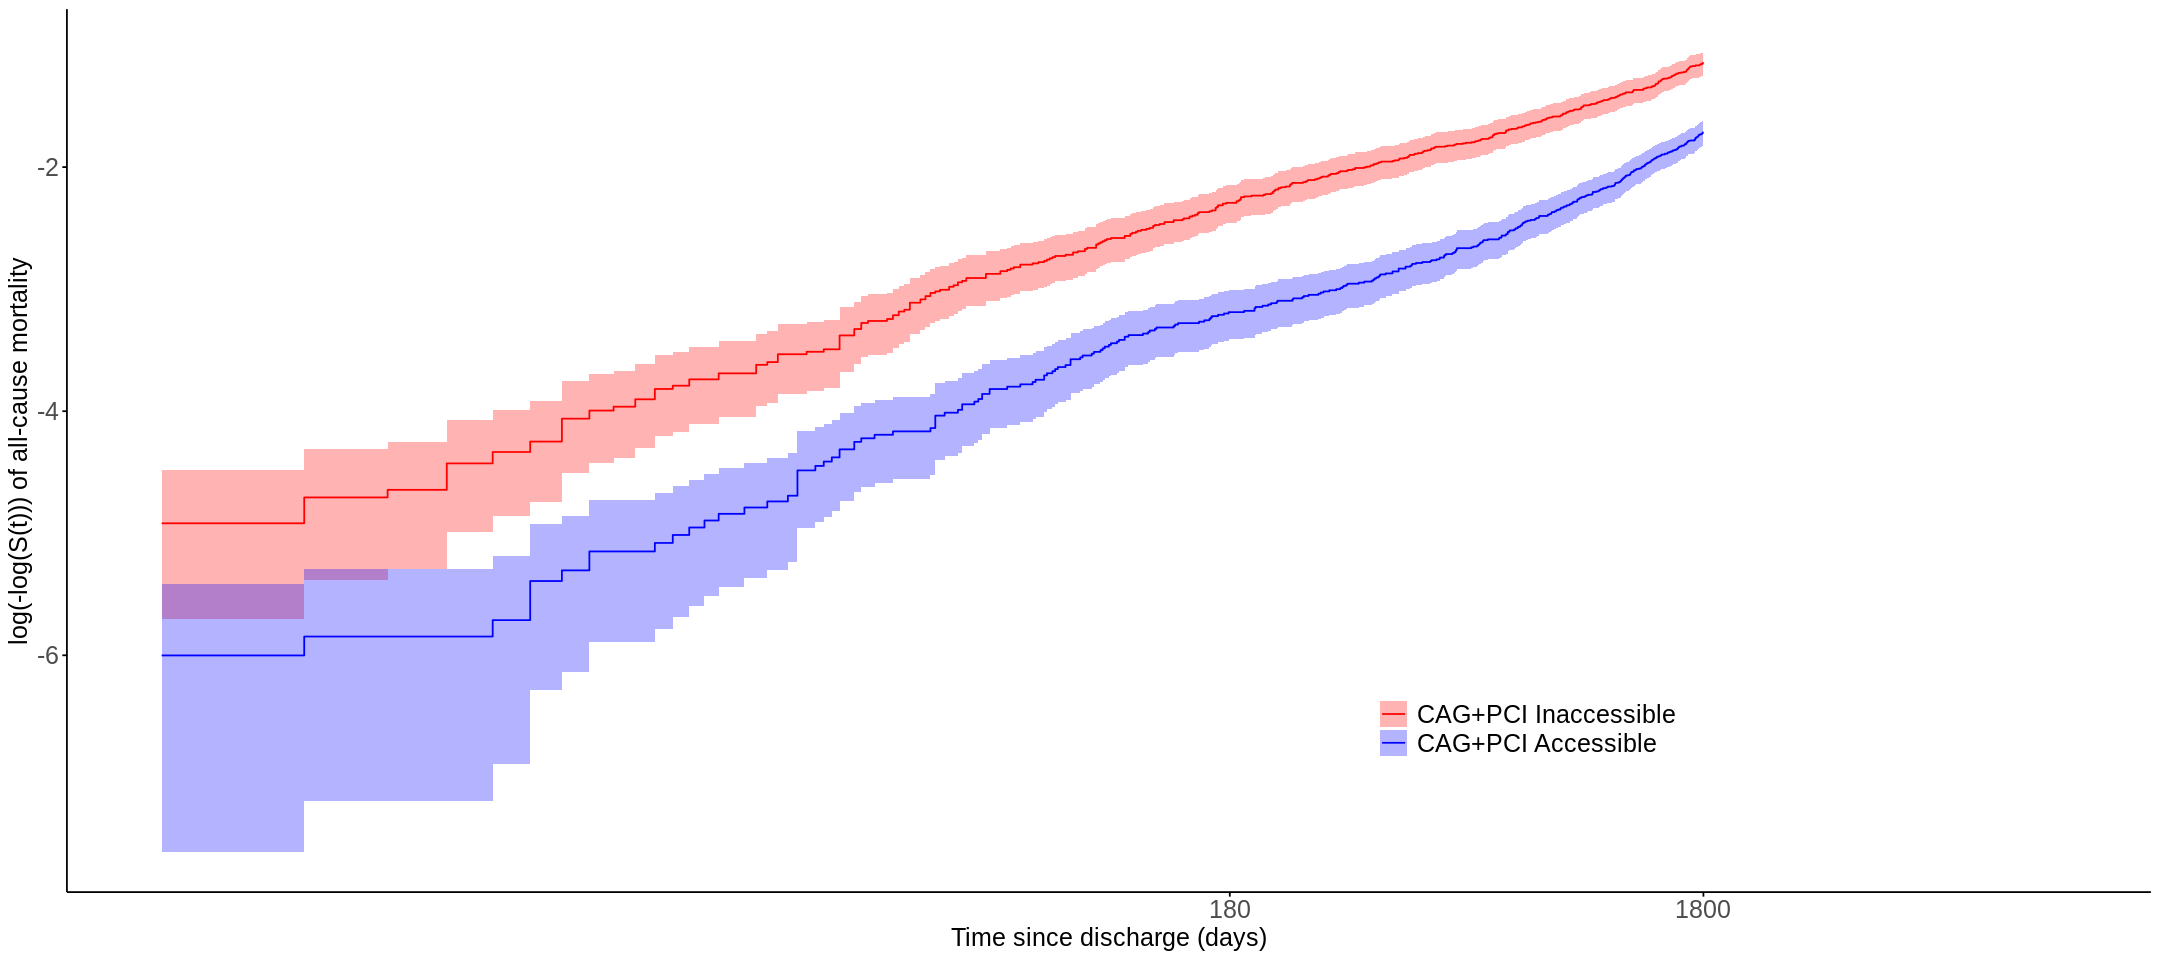

In [111]:
clog_stemi<-ggsurvplot(
  fit_cad_stemi,
  data = stemi,
  fun ="cloglog",
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  legend.title = "",
  size=0.5,
  legend= c(0.7,0.2),
  ggtheme = theme_classic()
)
clog_stemi$plot+ylab("log(-log(S(t))) of all-cause mortality")+
  scale_x_continuous(trans="log",breaks = c(180,1800),limits=c(1,1800),name="Time since discharge (days)")+
  theme(legend.text = element_text(size=15),
        legend.key = element_rect(fill = "transparent",colour ="transparent"),
        legend.background = element_blank(),
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))

### **HR of NST-ACS**

In [90]:
nstacs<-md[type=="NSTACS"]
fit_cad_nstacs <- survfit(Surv(fday, death) ~ pci, data = nstacs)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


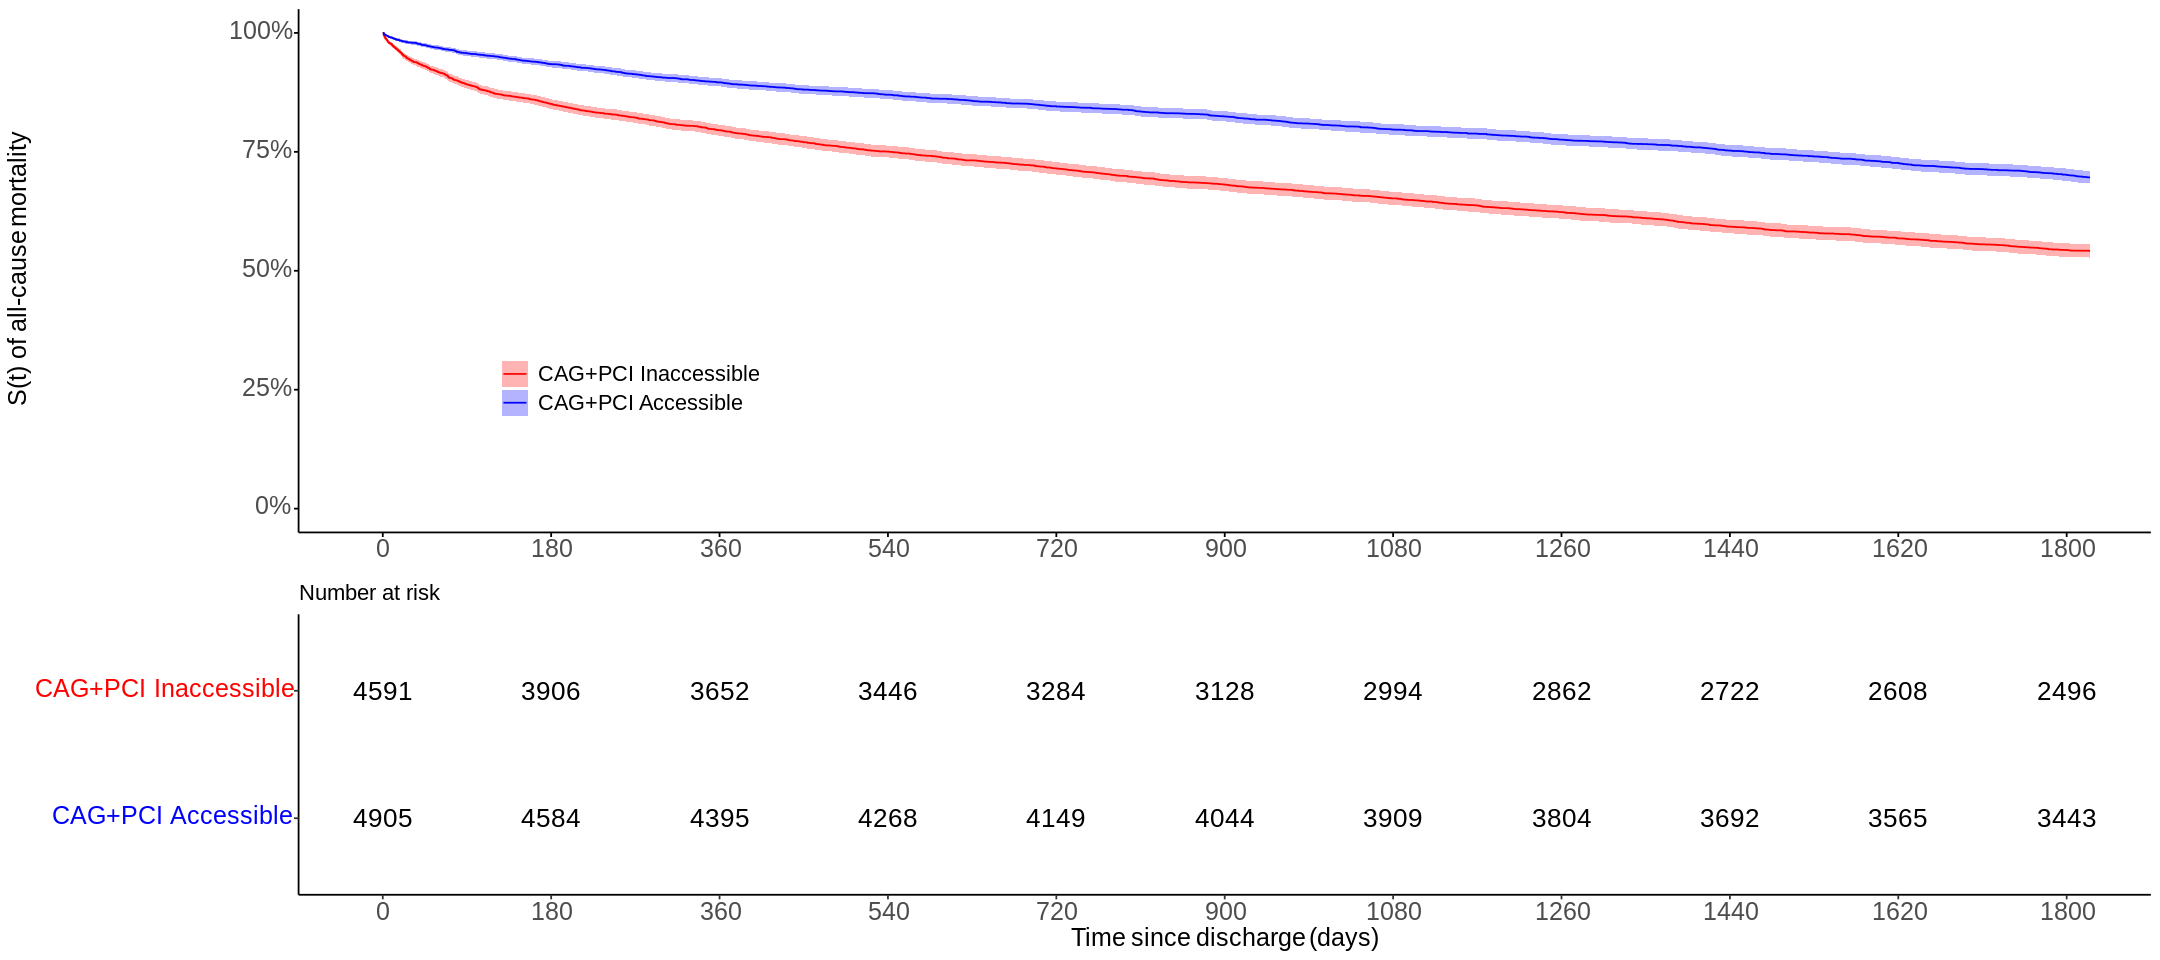

In [112]:
ggsurv_cad_nstacs <-ggsurvplot(
  fit_cad_nstacs,
  data = nstacs,
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  risk.table = TRUE,
  risk.table.col = "black", risk.table.fontsize = 5.5,
  legend.title = "",
  size=0.5,
  surv.scale ="percent",
  xlab = "Time since discharge (days)",
  ylab = "S(t) of all-cause mortality",
  xlim = c(0,1800),
  legend = c(0.18,0.3),
  risk.table.height = 0.4,
  break.time.by = 180,
  ggtheme = theme_classic()
)

ggsurv_cad_nstacs <- customize_labels(
  ggsurv_cad_nstacs,
  font.subtitle = c(15),
  font.caption =c(15),
  font.x        = c(15),
  font.y        = c(15),
  font.xtickslab = c(15),
  font.ytickslab = c(15)
)

ggsurv_cad_nstacs$plot<-ggsurv_cad_nstacs$plot + scale_x_continuous(name = "",breaks = 0:10*180)+
  theme(legend.text = element_text(size = 13),
        legend.background = element_blank())
ggsurv_cad_nstacs

In [93]:
cox.nstacs <- coxph(Surv(fday, death) ~ pci, data = nstacs)
cox.display(cox.nstacs)

,HR(95%CI),P(Wald's test),P(LR-test)
pci,"0.57 (0.54,0.61)",< 0.001,< 0.001
,,,


In [94]:
summary(pyears(formula = Surv(fday/365.25, death) ~ pci, data = nstacs,scale=1))

Call: pyears(formula = Surv(fday/365.25, death) ~ pci, data = nstacs, 
    scale = 1)

number of observations = 9496

  pci     N     Events     Time    
------- ------ -------- ---------- 
 FALSE   4591    2104    15944.50 
 TRUE    4905    1490    20216.79 


Checking the proportional hazards assumption

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 26 rows containing missing values (`geom_step()`).”


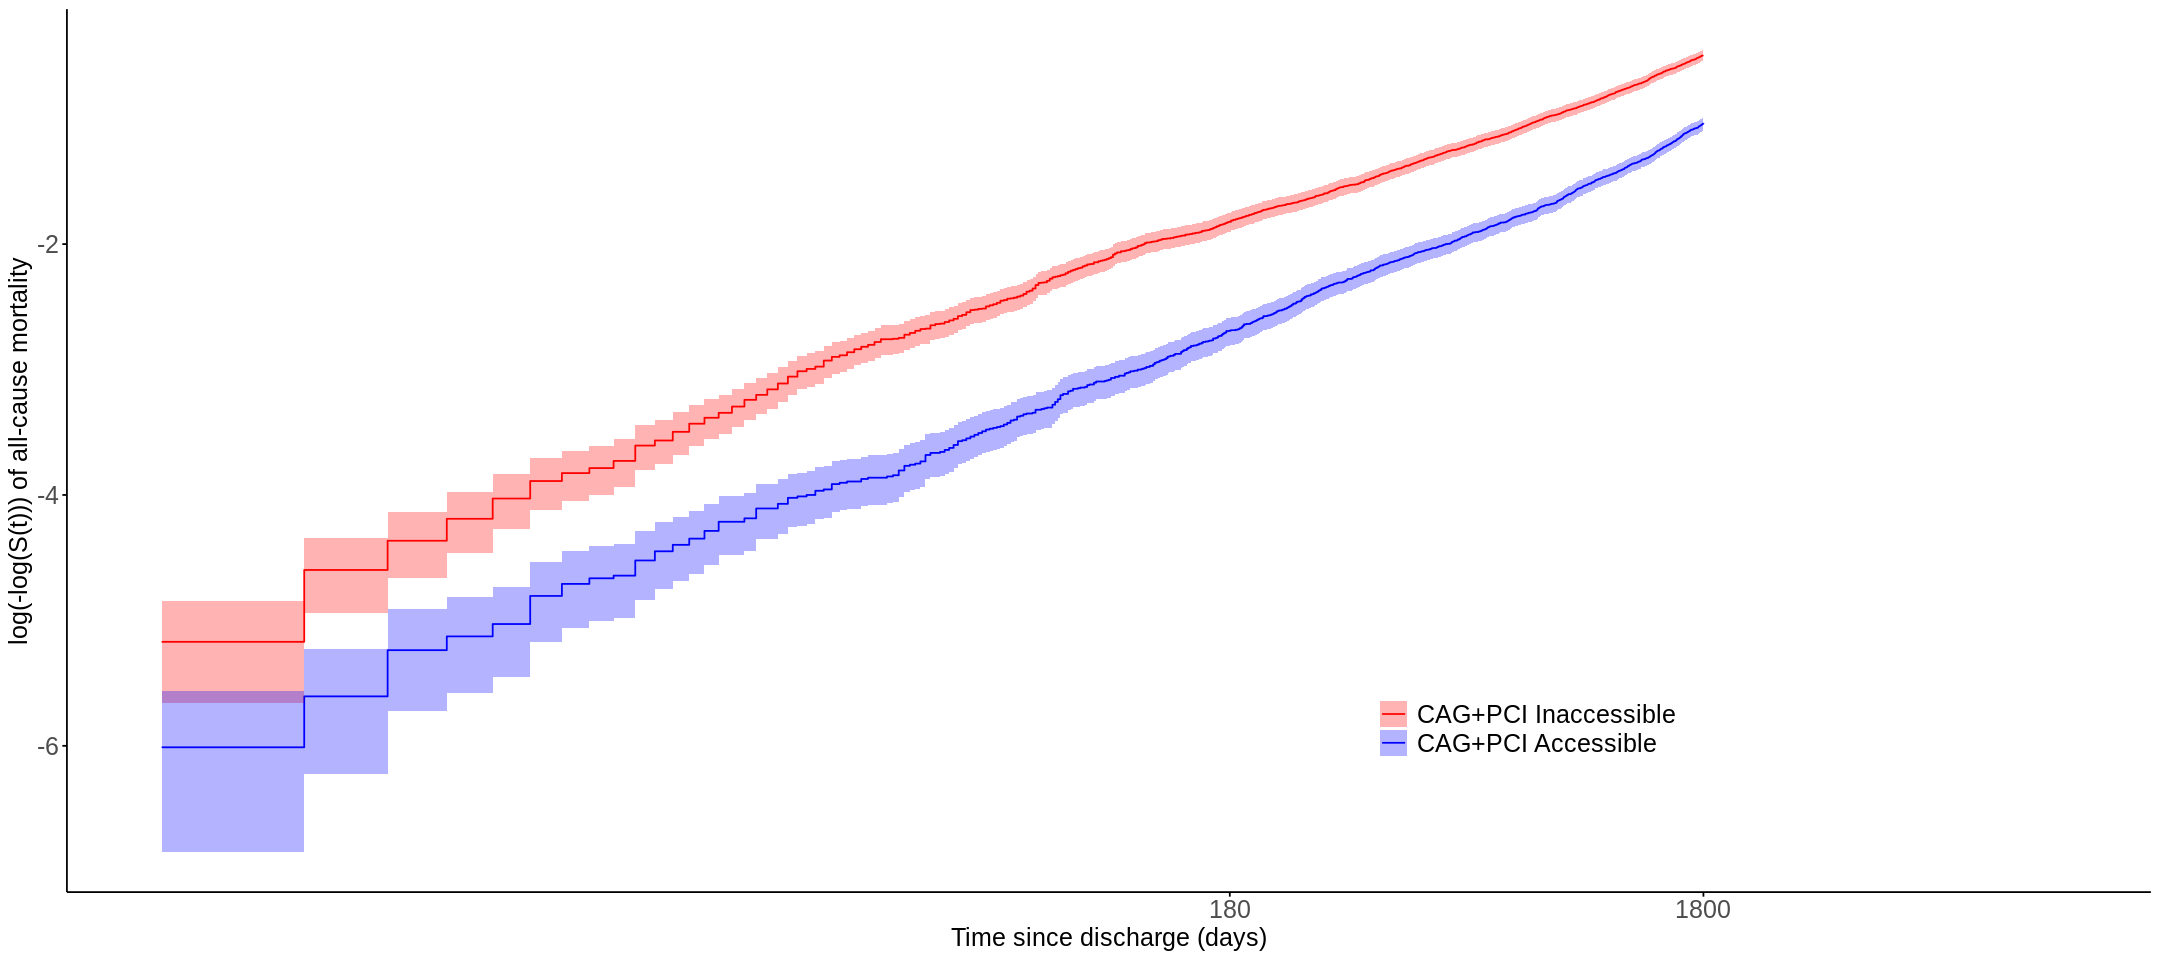

In [113]:
clog_nstacs<-ggsurvplot(
  fit_cad_nstacs,
  data = nstacs,
  fun ="cloglog",
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  legend.title = "",
  size=0.5,
  legend= c(0.7,0.2),
  ggtheme = theme_classic()
)
clog_nstacs$plot+ylab("log(-log(S(t))) of all-cause mortality")+
  scale_x_continuous(trans="log",breaks = c(180,1800),limits=c(1,1800),name="Time since discharge (days)")+
  theme(legend.text = element_text(size=15),
        legend.key = element_rect(fill = "transparent",colour ="transparent"),
        legend.background = element_blank(),
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))

# **Cox regression for death related to heart condition**

Turn death from other cause into censor

In [97]:
md$cvd<-str_detect(md$dcause_oth,"หัวใจ")
md$cvd<-replace_na(md$cvd,FALSE)
md$death[md$cvd==TRUE]<-FALSE

### **HR of STEMI**

In [114]:
stemi_cvd<-md[type=="STEMI"]
fit_cad_stemi_cvd <- survfit(Surv(fday, death) ~ pci, data = stemi_cvd)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


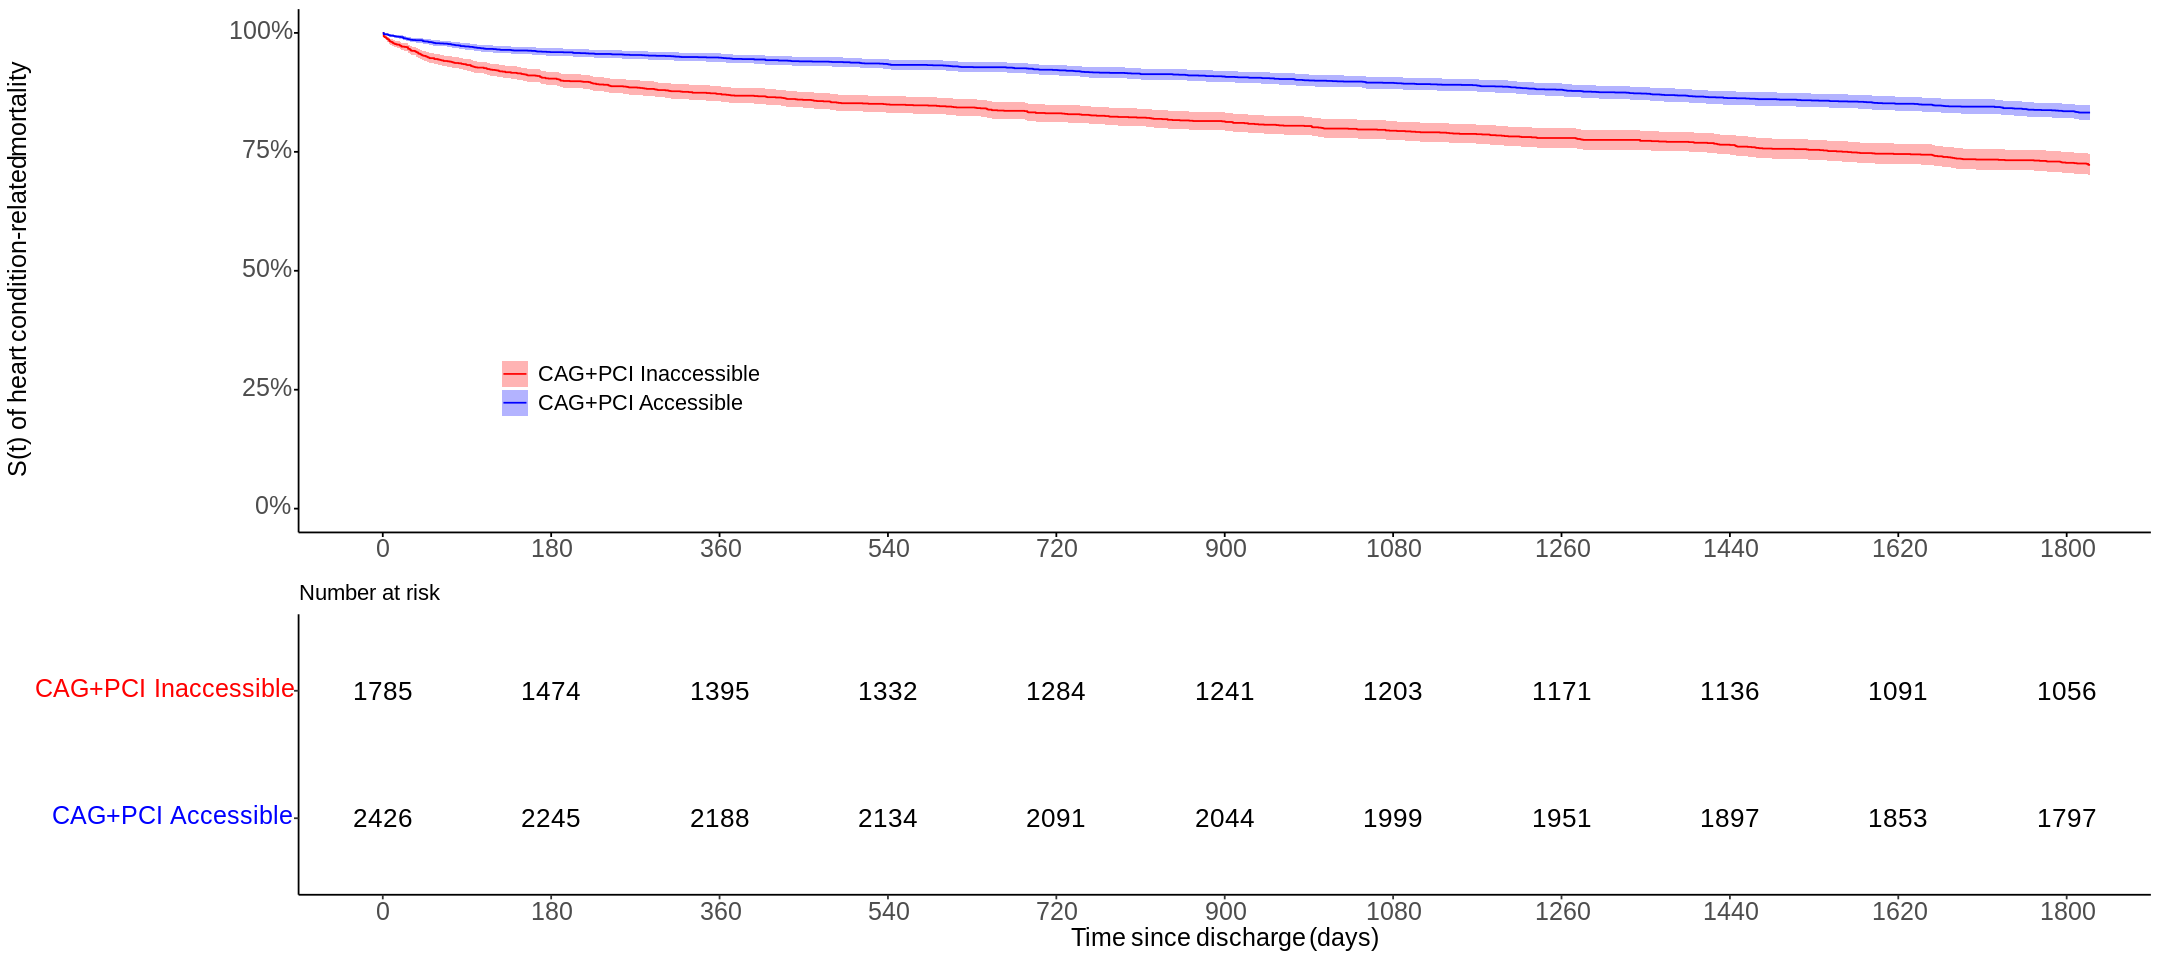

In [115]:
ggsurv_cad_stemi_cvd <-ggsurvplot(
  fit_cad_stemi_cvd,
  data = stemi_cvd,
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  risk.table = TRUE,
  risk.table.col = "black", risk.table.fontsize = 5.5,
  legend.title = "",
  size=0.5,
  surv.scale ="percent",
  xlab = "Time since discharge (days)",
  ylab = "S(t) of heart condition-related mortality",
  xlim = c(0,1800),
  legend = c(0.18,0.3),
  risk.table.height = 0.4,
  break.time.by = 180,
  ggtheme = theme_classic()
)

ggsurv_cad_stemi_cvd <- customize_labels(
  ggsurv_cad_stemi_cvd,
  font.subtitle = c(15),
  font.caption =c(15),
  font.x        = c(15),
  font.y        = c(15),
  font.xtickslab = c(15),
  font.ytickslab = c(15)
)

ggsurv_cad_stemi_cvd$plot<-ggsurv_cad_stemi_cvd$plot + scale_x_continuous(name = "",breaks = 0:10*180)+
  theme(legend.text = element_text(size = 13),
        legend.background = element_blank())
ggsurv_cad_stemi_cvd

In [99]:
cox.stemi_cvd <- coxph(Surv(fday, death) ~ pci, data = stemi_cvd)
cox.display(cox.stemi_cvd)

,HR(95%CI),P(Wald's test),P(LR-test)
pci,"0.55 (0.48,0.63)",< 0.001,< 0.001
,,,


In [100]:
summary(pyears(formula = Surv(fday/365.25, death) ~ pci, data = stemi_cvd,scale=1))

Call: pyears(formula = Surv(fday/365.25, death) ~ pci, data = stemi_cvd, 
    scale = 1)

number of observations = 4211

  pci     N     Events     Time     
------- ------ -------- ----------- 
 FALSE   1785    440      6313.777 
 TRUE    2426    380     10210.308 


Checking the proportional hazards assumption

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 14 rows containing missing values (`geom_step()`).”


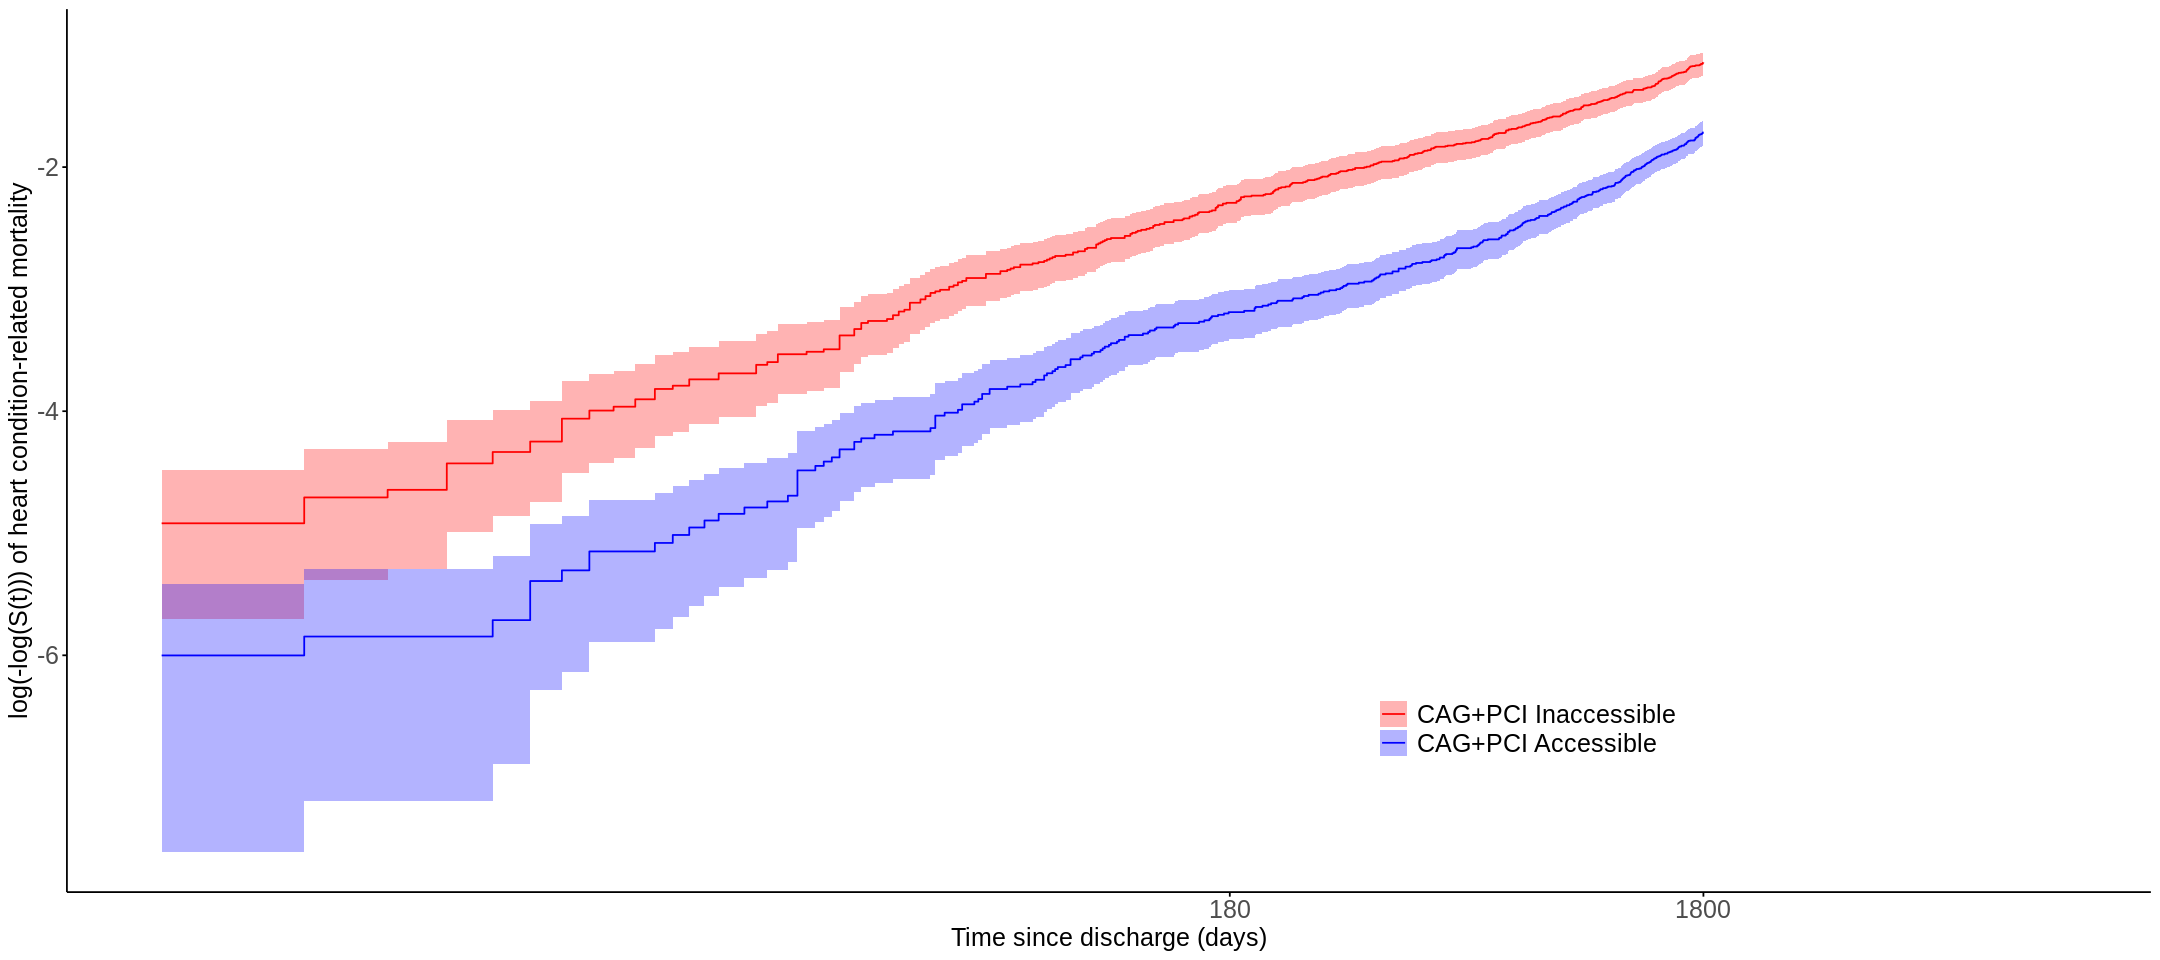

In [116]:
clog_stemi_cvd<-ggsurvplot(
  fit_cad_stemi_cvd,
  data = stemi_cvd,
  fun ="cloglog",
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  legend.title = "",
  size=0.5,
  legend= c(0.7,0.2),
  ggtheme = theme_classic()
)
clog_stemi_cvd$plot+ylab("log(-log(S(t))) of heart condition-related mortality")+
  scale_x_continuous(trans="log",breaks = c(180,1800),limits=c(1,1800),name="Time since discharge (days)")+
  theme(legend.text = element_text(size=15),
        legend.key = element_rect(fill = "transparent",colour ="transparent"),
        legend.background = element_blank(),
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))

### **HR of NST-ACS**

In [104]:
nstacs_cvd<-md[type=="NSTACS"]
fit_cad_nstacs_cvd <- survfit(Surv(fday, death) ~ pci, data = nstacs_cvd)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


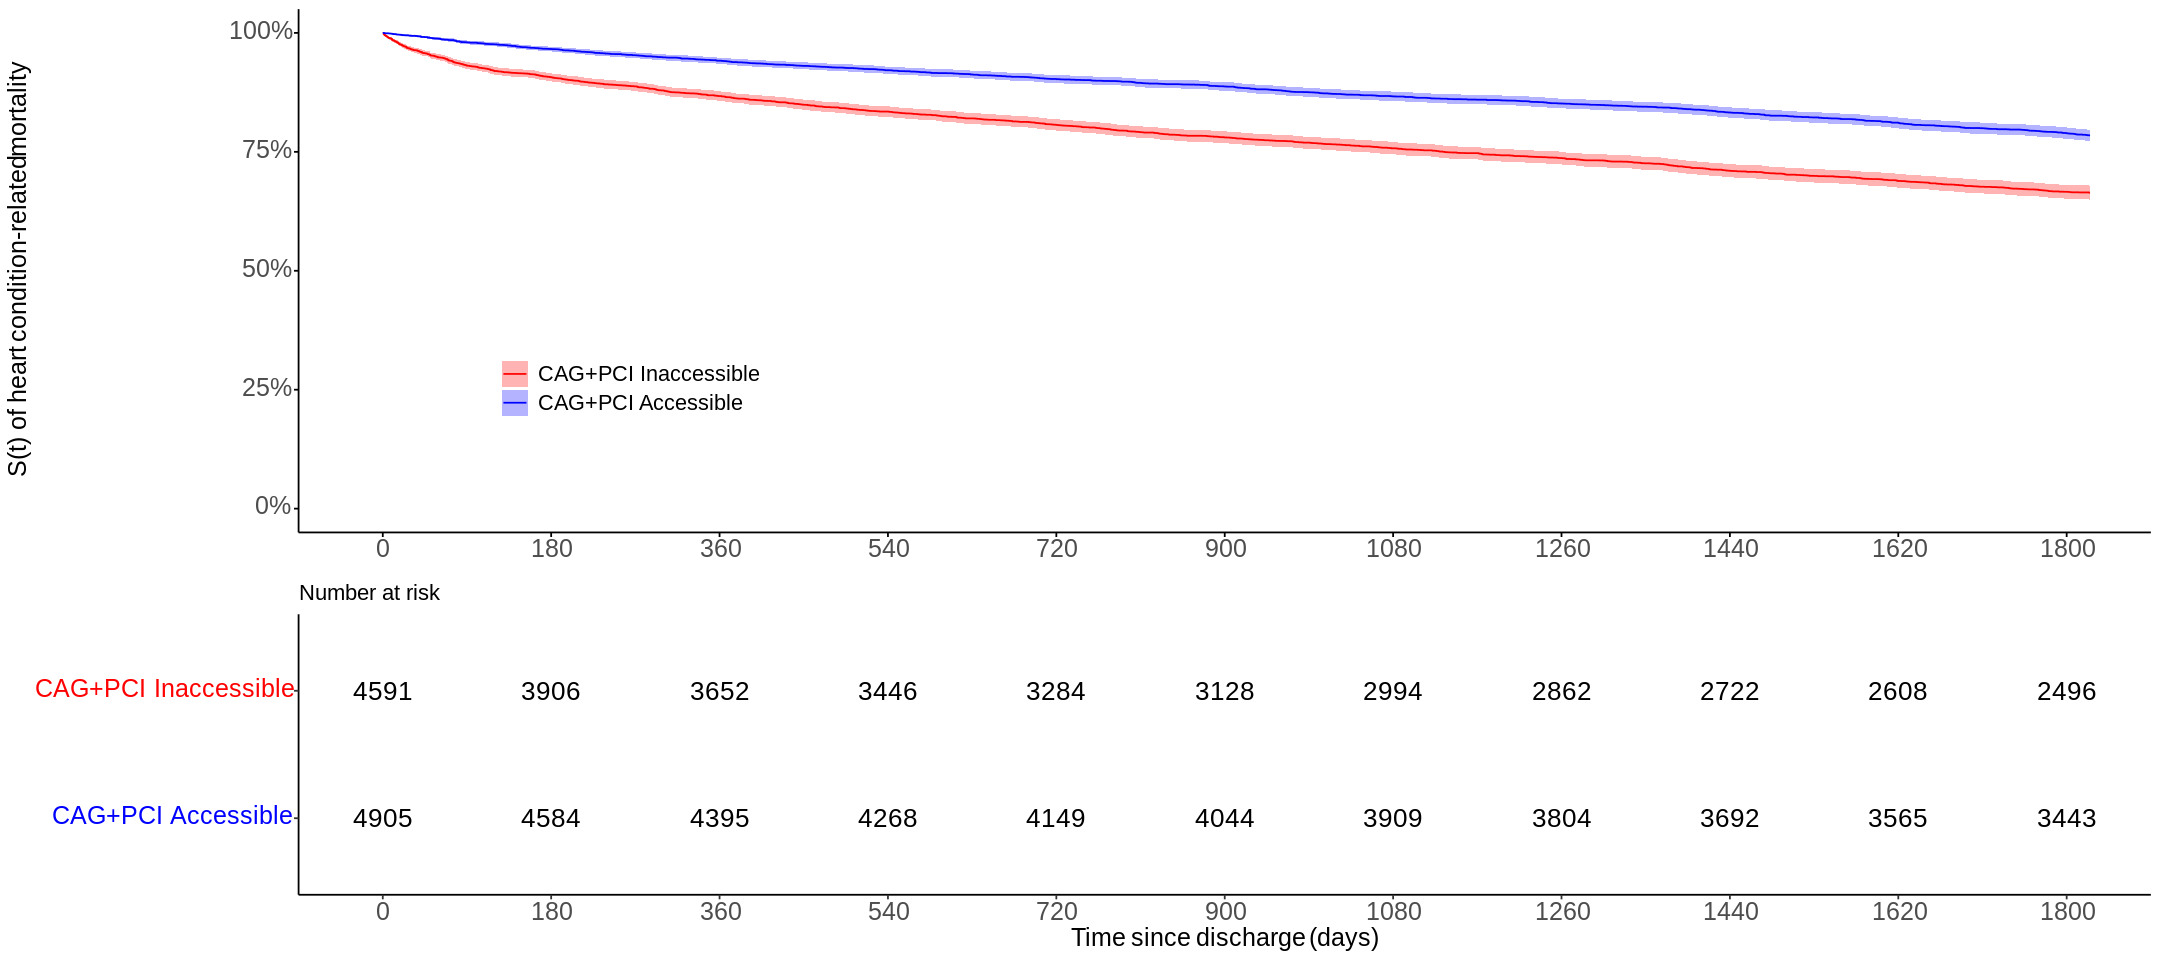

In [105]:
ggsurv_cad_nstacs_cvd <-ggsurvplot(
  fit_cad_nstacs_cvd,
  data = nstacs_cvd,
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  risk.table = TRUE,
  risk.table.col = "black", risk.table.fontsize = 5.5,
  legend.title = "",
  size=0.5,
  surv.scale ="percent",
  xlab = "Time since discharge (days)",
  ylab = "S(t) of heart condition-related mortality",
  xlim = c(0,1800),
  legend = c(0.18,0.3),
  risk.table.height = 0.4,
  break.time.by = 180,
  ggtheme = theme_classic()
)

ggsurv_cad_nstacs_cvd <- customize_labels(
  ggsurv_cad_nstacs_cvd,
  font.subtitle = c(15),
  font.caption =c(15),
  font.x        = c(15),
  font.y        = c(15),
  font.xtickslab = c(15),
  font.ytickslab = c(15)
)

ggsurv_cad_nstacs_cvd$plot<-ggsurv_cad_nstacs_cvd$plot + scale_x_continuous(name = "",breaks = 0:10*180)+
  theme(legend.text = element_text(size = 13),
        legend.background = element_blank())
ggsurv_cad_nstacs_cvd

In [106]:
cox.nstacs_cvd <- coxph(Surv(fday, death) ~ pci, data = nstacs_cvd)
cox.display(cox.nstacs_cvd)

,HR(95%CI),P(Wald's test),P(LR-test)
pci,"0.57 (0.53,0.62)",< 0.001,< 0.001
,,,


In [107]:
summary(pyears(formula = Surv(fday/365.25, death) ~ pci, data = nstacs_cvd,scale=1))

Call: pyears(formula = Surv(fday/365.25, death) ~ pci, data = nstacs_cvd, 
    scale = 1)

number of observations = 9496

  pci     N     Events     Time    
------- ------ -------- ---------- 
 FALSE   4591    1389    15944.50 
 TRUE    4905     985    20216.79 


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 26 rows containing missing values (`geom_step()`).”


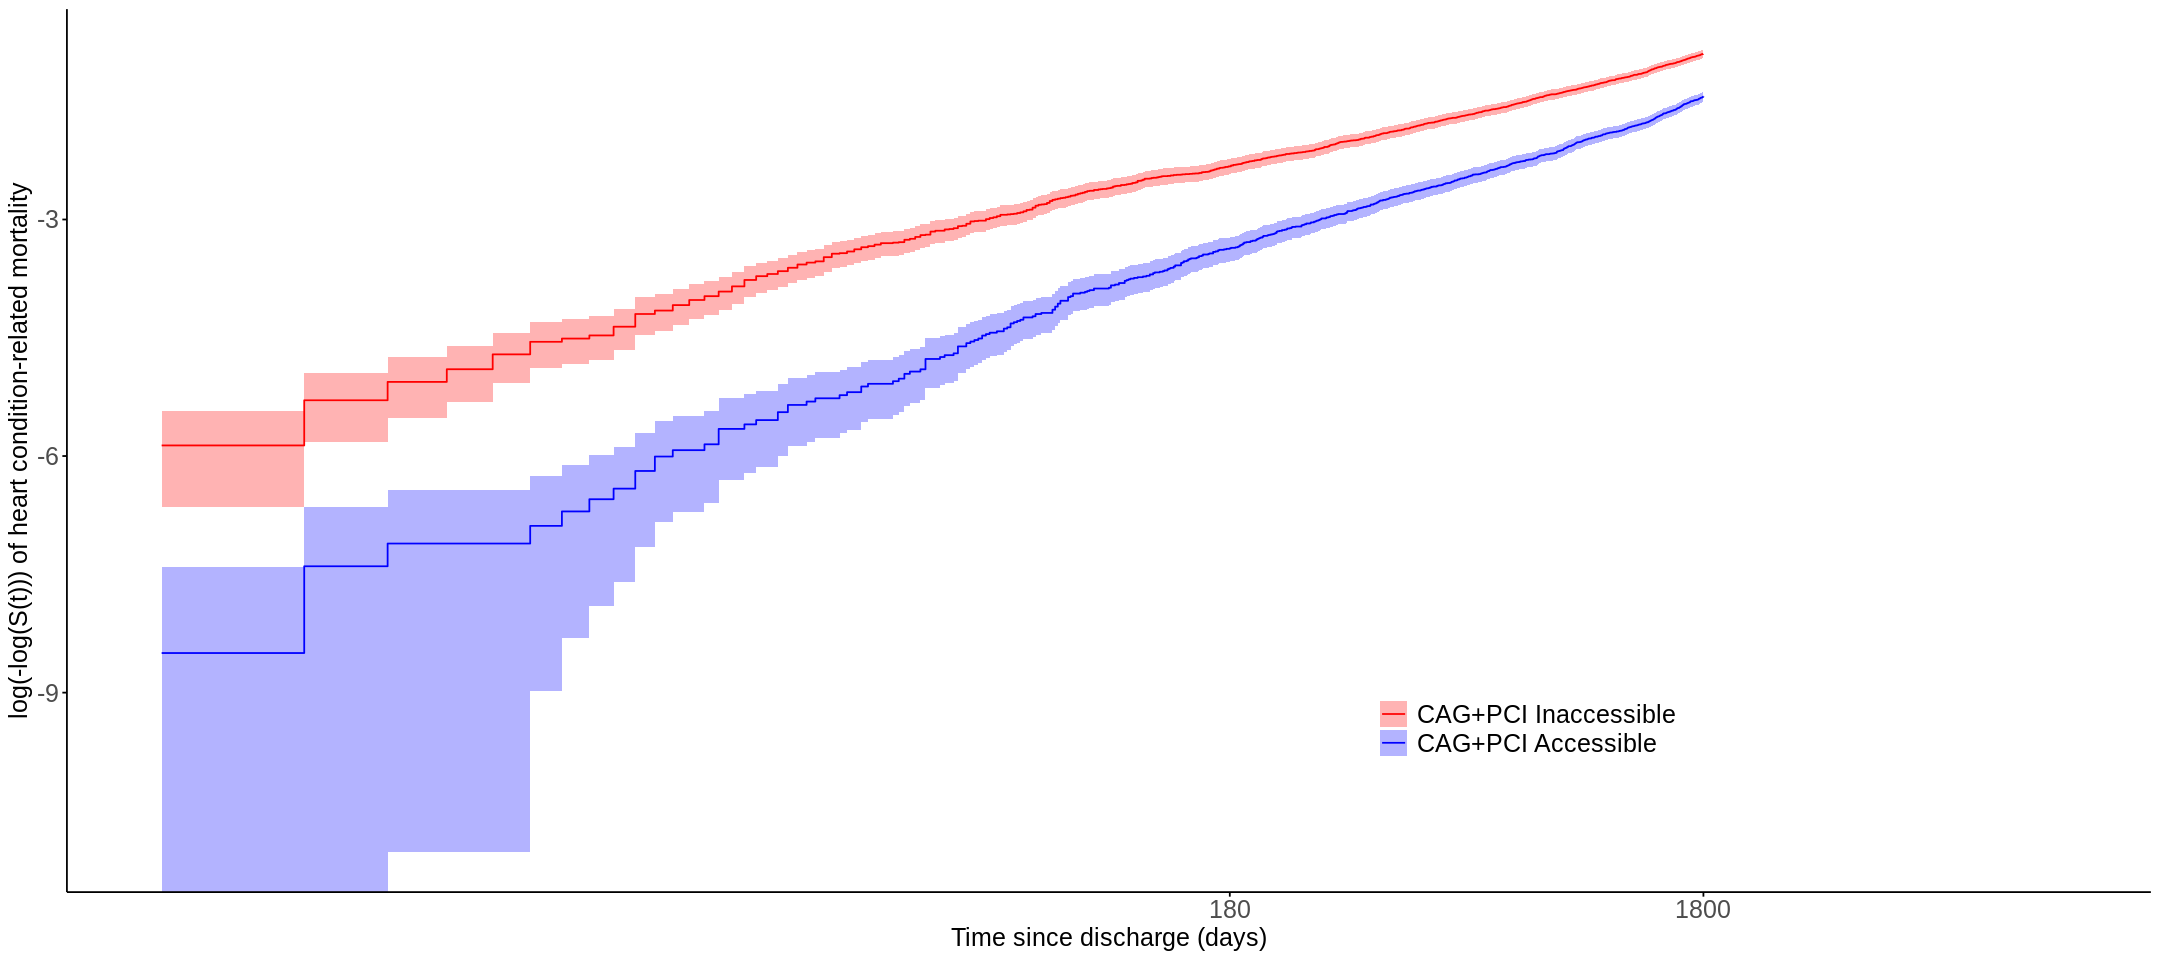

In [108]:
clog_nstacs_cvd<-ggsurvplot(
  fit_cad_nstacs_cvd,
  data = nstacs_cvd,
  fun ="cloglog",
  conf.int = TRUE,
  censor = FALSE,
  palette = c("red","blue"),
  legend.labs = c("CAG+PCI Inaccessible","CAG+PCI Accessible"),
  legend.title = "",
  size=0.5,
  legend= c(0.7,0.2),
  ggtheme = theme_classic()
)
clog_nstacs_cvd$plot+ylab("log(-log(S(t))) of heart condition-related mortality")+
  scale_x_continuous(trans="log",breaks = c(180,1800),limits=c(1,1800),name="Time since discharge (days)")+
  theme(legend.text = element_text(size=15),
        legend.key = element_rect(fill = "transparent",colour ="transparent"),
        legend.background = element_blank(),
        axis.text.x = element_text(size=15),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size=15))

# **E-value calculation**

In-hospital mortality ratio for STEMI

In [119]:
evalues.RR(est = 0.3009815, lo = 0.3002040, hi = 0.3017609)

,point,lower,upper
RR,0.3009815,0.300204,0.3017609
E-values,6.1002861,NA,6.0829850


In-hospital mortality ratio for NST-ACS

In [120]:
evalues.RR(est = 0.3471933, lo = 0.3463373, hi = 0.3480515)

,point,lower,upper
RR,0.3471933,0.3463373,0.3480515
E-values,5.2073716,NA,5.1930053


HR of all-cause mortality for STEMI

In [122]:
evalues.HR(est = 0.55, lo = 0.5, hi = 0.62, rare = FALSE)

,point,lower,upper
RR,0.6618651,0.6201368,0.7185782
E-values,2.3894501,NA,2.1298892


HR of all-cause mortality for NST-ACS

In [123]:
evalues.HR(est = 0.57, lo = 0.54, hi = 0.61, rare = FALSE)

,point,lower,upper
RR,0.6782625,0.6536052,0.7105896
E-values,2.3106379,NA,2.1643557


HR of heart condition-related mortality for STEMI

In [124]:
evalues.HR(est = 0.55, lo = 0.48, hi = 0.63, rare = FALSE)

,point,lower,upper
RR,0.6618651,0.6031319,0.7265309
E-values,2.3894501,NA,2.0961844


HR of heart condition-related mortality for NST-ACS

In [125]:
evalues.HR(est = 0.57, lo = 0.53, hi = 0.62, rare = FALSE)

,point,lower,upper
RR,0.6782625,0.6453033,0.7185782
E-values,2.3106379,NA,2.1298892
